# Bab 1: Introduction

Nama: Mohammad Dandy Goesti

Dataset: credit-card-information

Problem Statement/Objective:   

Pada project kali ini bertujuan untuk membuat Customer Segementation dari informasi penggunaan kartu kredit dengan jangka waktu 6 bulan. Classification akan dibuat menggunakan metode K-mean clustering yang berdasarkan perhitungan centroid. Hasil dari penelitian akan merupakan jumlah cluster, setiap cluster akan mempunyai karakteristik masing-masing dan diharap menghasilkan insight yang akan berguna bagi pihak bank untuk mengenali setiap kelompok penggunanya. Tahapan akan dimulai dengan pemrosesan data, pemilihan fitur, pembuatan cluster lalu model evaluasi dan kesimpulan dikerjakan selama +- 5 hari.

# Bab 2: Query SQL

Bagian ini dilakukan pada BiqQuery, yaitu mengambil dataset sesuai dengan yang dibutuhkan. Dataset yang sudah sesuai kemudian akan disave dalam bentuk csv.

In [1]:
'''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_003_bsd.credit-card-information`
WHERE MOD(CUST_ID,2) = 1;
'''

'\nSELECT *\nFROM `ftds-hacktiv8-project.phase1_ftds_003_bsd.credit-card-information`\nWHERE MOD(CUST_ID,2) = 1;\n'

# Bab 3: Import Libraries

Pada tahap ini saya akan mengimport libraries yang dibutuhkan untuk analisa dan prediksi termasuk libraries untuk algorithm.

In [2]:
# Import Libraries yang akan digunakan pada analisis ini

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
import pickle

# Bab 4: Data Loading & Cleaning

Pada tahap ini akan dilakukan proses persiapan data sebelum dilanjukan eksplorasi dan analisa. Saya akan melihat info dari dataset lalu kemudian saya akan merubah atau menghapus data sesuai dengan proses yang dibutuhkan.

In [3]:
# Membaca dataset
df_ori=pd.read_csv("P1G6_Set_1_dandy_raw.csv")

# Duplikat data original
df_raw = df_ori.copy()

# Melihat 10 data pertama pada dataset dengan setting semua columns
pd.set_option("display.max_columns" , None)
df_raw.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [4]:
# Melihat 10 data terakhir pada dataset
df_raw.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [5]:
# Melihat info dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Dataset memiliki 4475 entries dan 18 columns dengan tipe data float dan int. 

---
Berikut adalah informasi mengenai feature yang ada pada dataset:

- CUST_ID : Identification of Credit Card holder (Categorical)  

- BALANCE : Balance amount left in their account to make purchases 
 
- BALANCE_FREQUENCY : How frequently the Balance is updated,   
score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

- PURCHASES : Amount of purchases made from account

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment

- CASH_ADVANCE : Cash in advance given by the user

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid

- CASH-ADVANCE-TRX : Number of Transactions made with "Cash in Advanced"

- PURCHASES_TRX : Number of purchase transactions made

- CREDIT_LIMIT : Limit of Credit Card for user

- PAYMENTS : Amount of Payment done by user

- MINIMUM_PAYMENTS : Minimum amount of payments made by user

- PRC_FULL_PAYMENT : Percent of full payment paid by user

- TENURE : Tenure of credit card service for use

Selanjutnya saya akan drop `CUST_ID` karena hanya berupa identifikasi pengguna kartu kredit.

In [6]:
# Drop kolom yang tidak dibutuhkan
df_raw.drop(['CUST_ID'], axis=1,inplace=True)

Dilanjutkan dengan menghitung data duplikat, jika ada akan di drop

In [7]:
# Menghitung jumlah data duplikat
df_raw.duplicated().sum()

0

Tidak ada data duplikat pada dataset, kemudian menghitung missing values

In [8]:
# Menghitung jumlah missing values
df_raw.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing values pada column `MINIMUM_PAYMENTS`, saya akan melihat persentase dan perbandingan dengan jumlah dataset

In [9]:
# Menghitung nilai null pada kolom 
null_MP = df_raw['MINIMUM_PAYMENTS'].isnull().sum()

# Menghitung total data pada kolom
total_MP = len(df_raw['MINIMUM_PAYMENTS'])

# Menghitung persentase missing value
perc_missing_MP = (null_MP / total_MP) * 100

print('total nilai null :', null_MP)
print('total data :', total_MP)
print(f"Persentase missing value pada kolom: {perc_missing_MP:.2f}%")

total nilai null : 155
total data : 4475
Persentase missing value pada kolom: 3.46%


Persentase cukup besar, saya akan melihat distribusinya dan menghandle berdasarkan hasilnya

In [10]:
# Melihat skewness 
print('Skewness MINIMUM_PAYMENTS:',df_raw['MINIMUM_PAYMENTS'].skew())

Skewness MINIMUM_PAYMENTS: 14.669771084332645


Karena Skewness pada column `MINIMUM_PAYMENTS` extremely skewed dan positif maka saya akan mengisi dengan median value. Median adalah pilihan yang baik ketika distribusi data cenderung positif skew karena median kurang sensitif terhadap outlier dan data ekstrem.

In [11]:
# Mengisi missing values pada MINIMUM_PAYMENTS dengan nilai median
df_raw['MINIMUM_PAYMENTS'] = df_raw['MINIMUM_PAYMENTS'].fillna(df_raw['MINIMUM_PAYMENTS'].median())

In [12]:
# Menghitung jumlah missing values kembali
df_raw.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values sudah dihandle dan tidak ada disemua column

In [13]:
# Melihat bentuk dari data
df_raw.shape

(4475, 17)

Terdapat 4475 rows dengan 17 columns.

In [14]:
# Menyimpan data ke csv baru
df_raw.to_csv('P1G6_Set_1_dandy.csv', index=False)
print('Data Tersimpan')

Data Tersimpan


In [15]:
# Membaca dataset format csv yang sudah di simpan sebelumnya dengan p.read_csv
df = pd.read_csv('P1G6_Set_1_dandy.csv')

In [16]:
# Melihat 5 data pertama hasil dari cleaning
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,313.980229,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,313.980229,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


# Bab 5: Exploratory Data Analysis (EDA)

Pada bagian ini akan dilakukan eksplorasi data, melihat persebaran data, dan juga mengetahui hubungan antara beberapa variable columns guna memahami data untuk analisa selanjutnya.

**Analisa distribusi values pada setiap column dalam dataset**

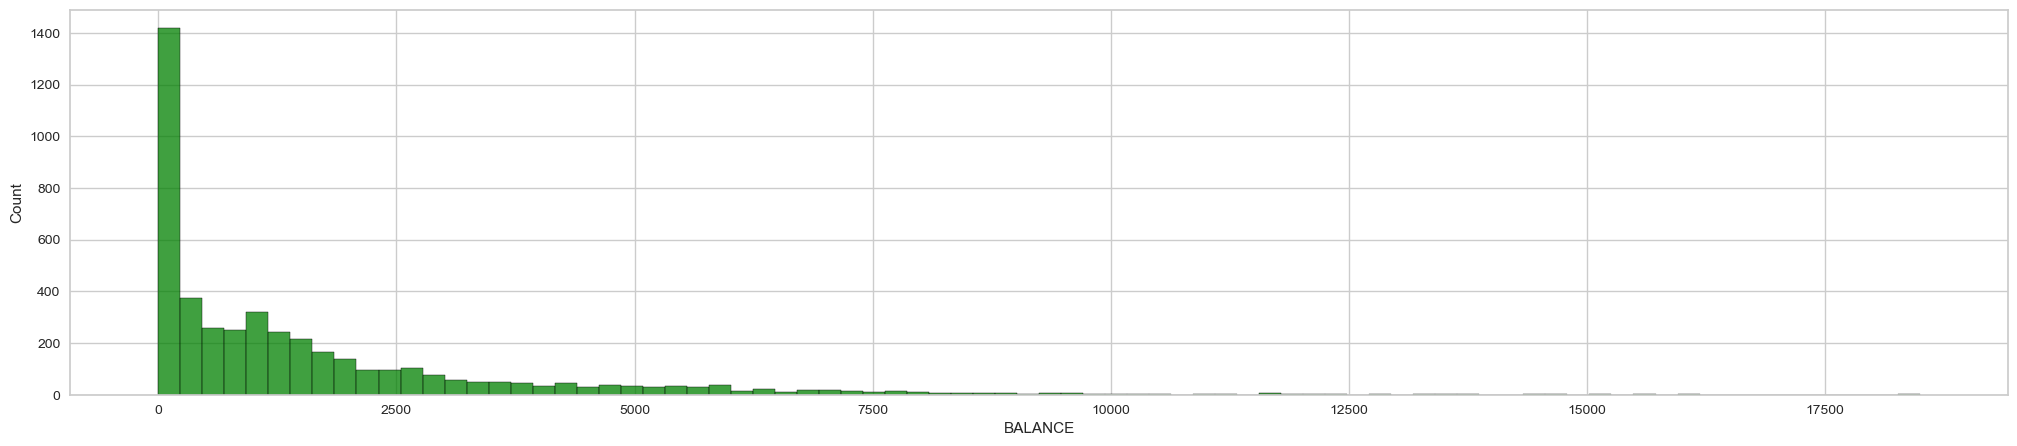

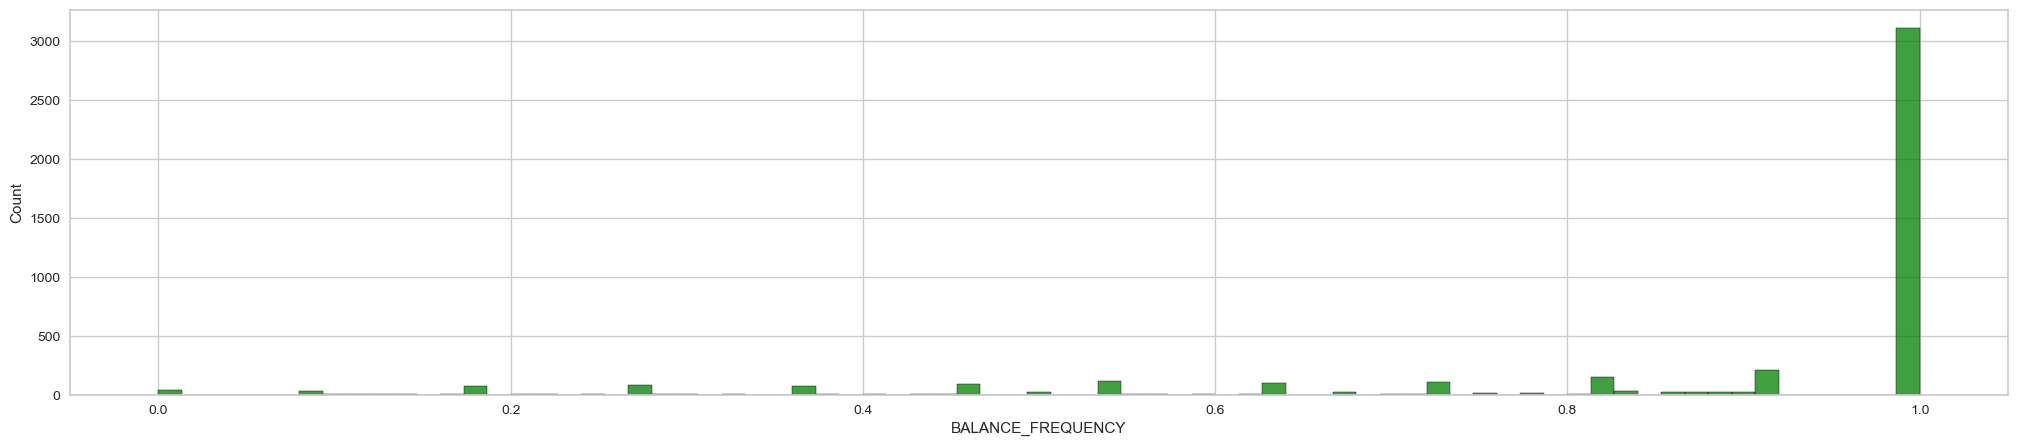

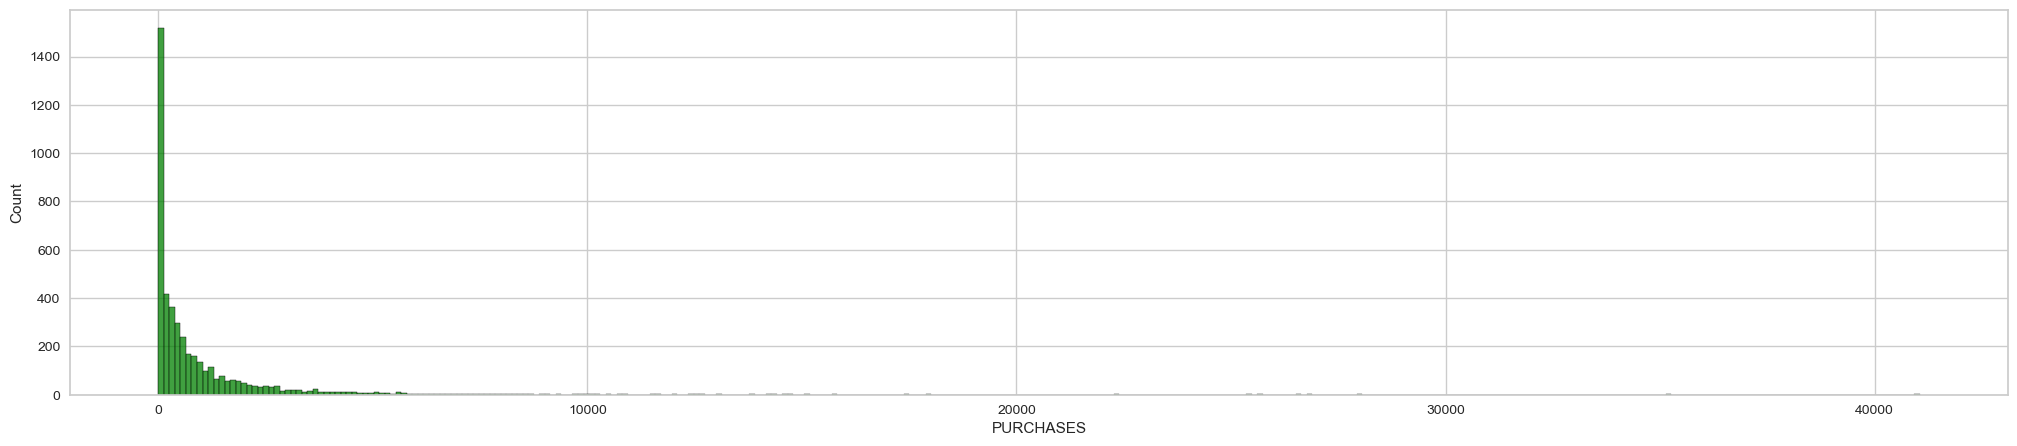

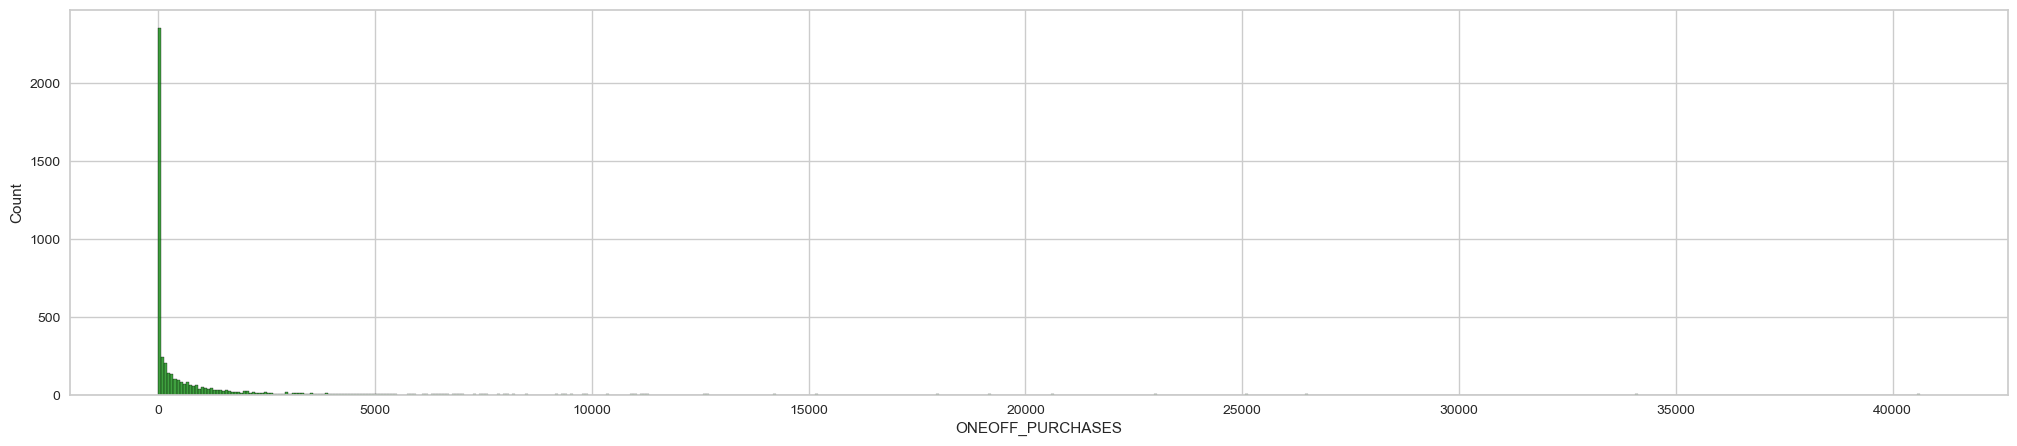

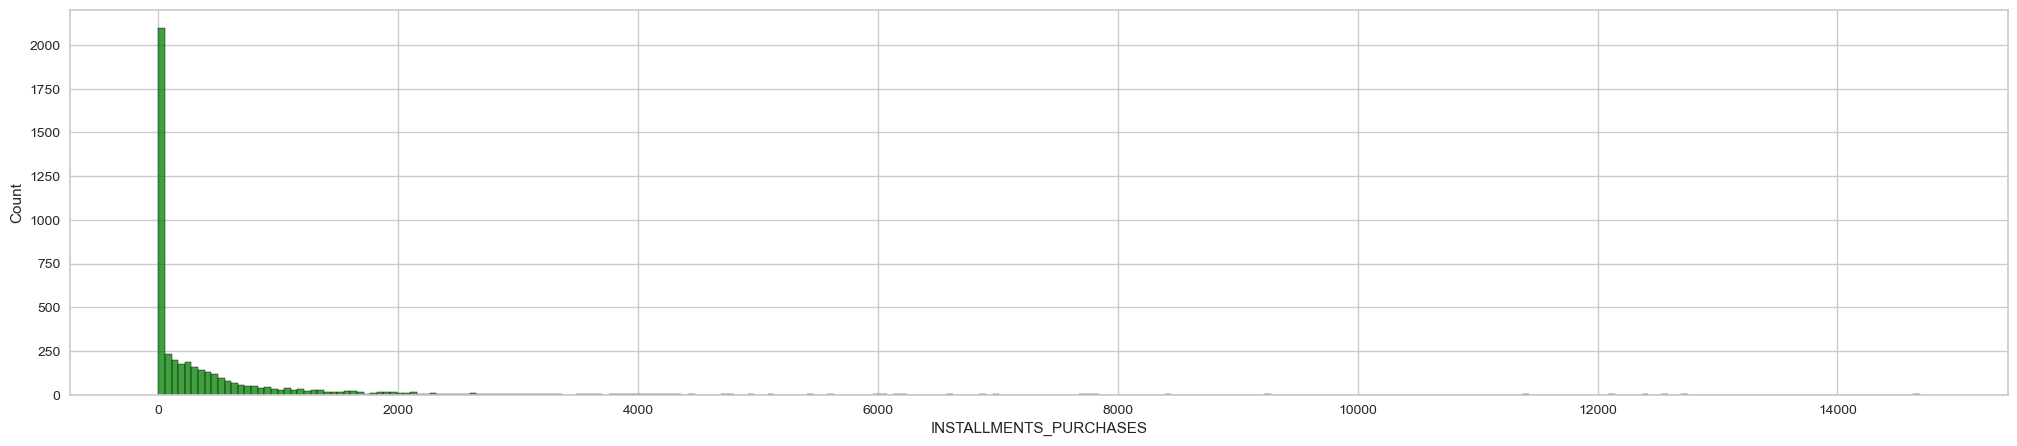

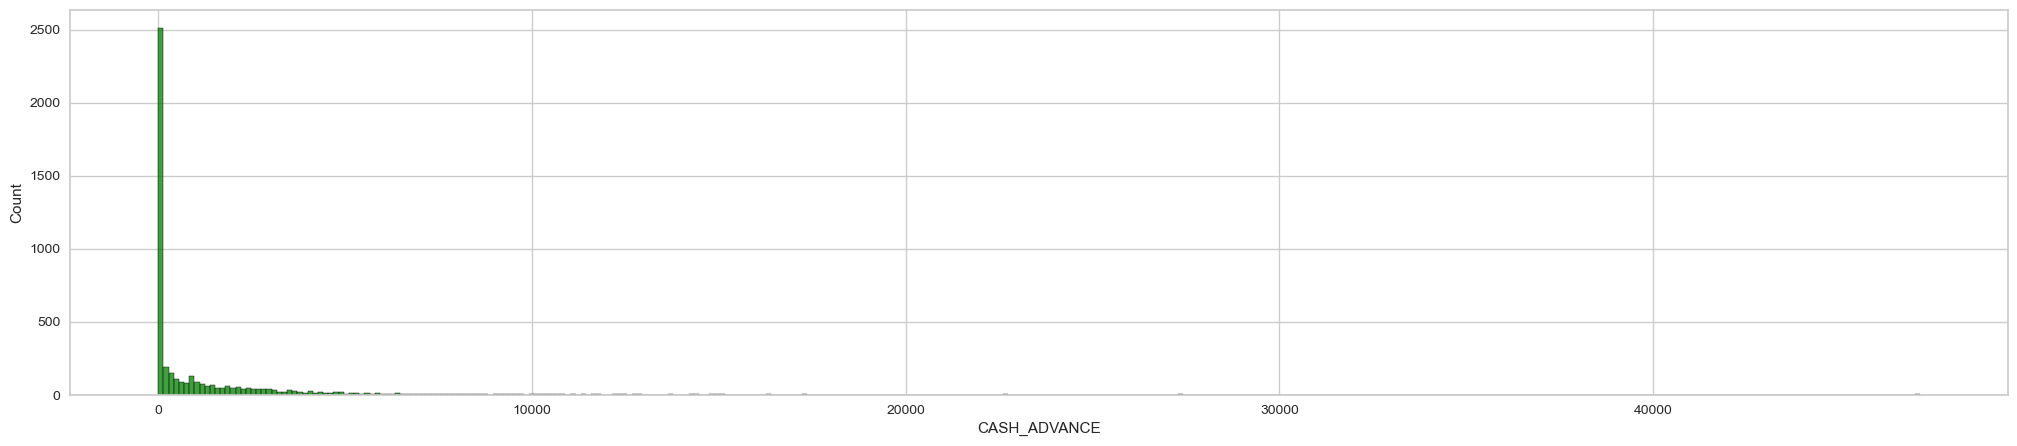

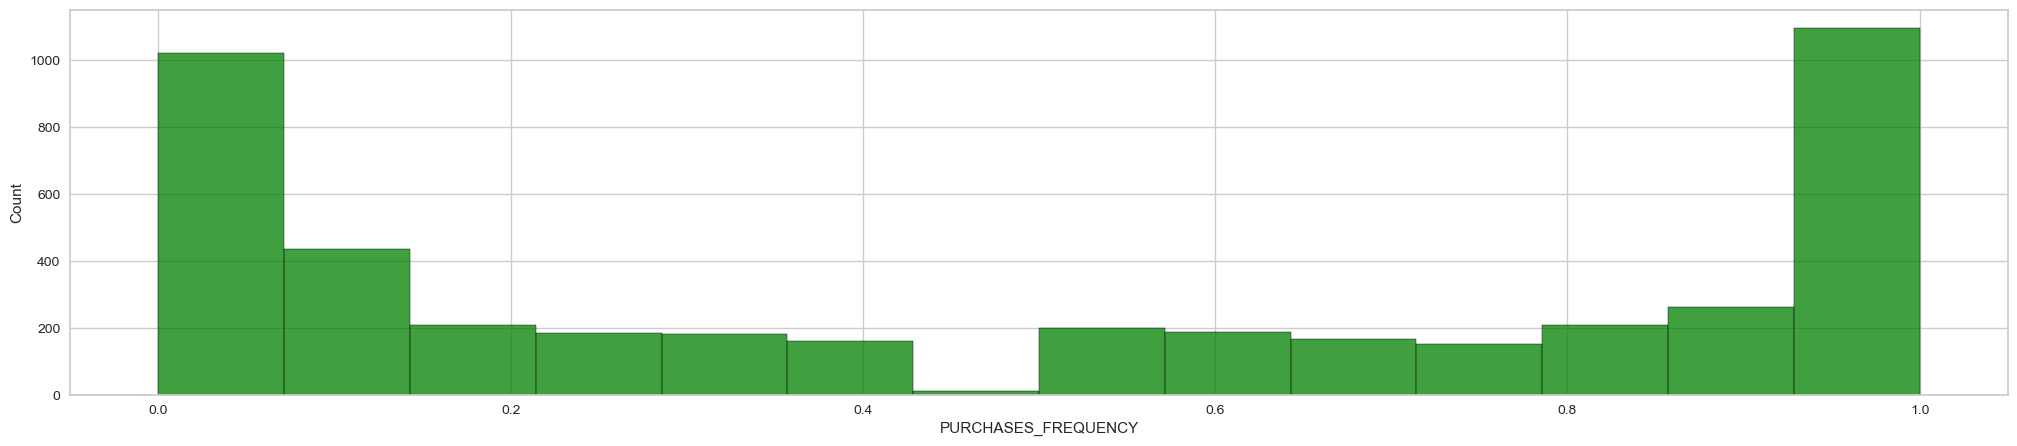

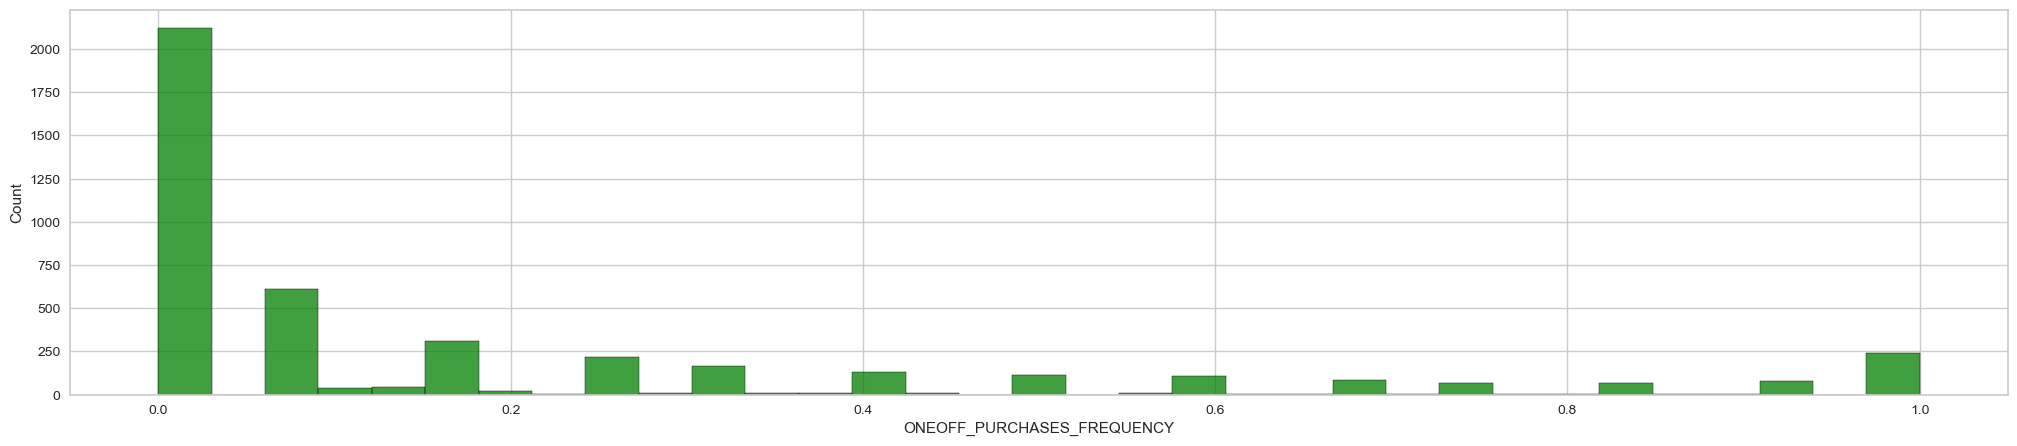

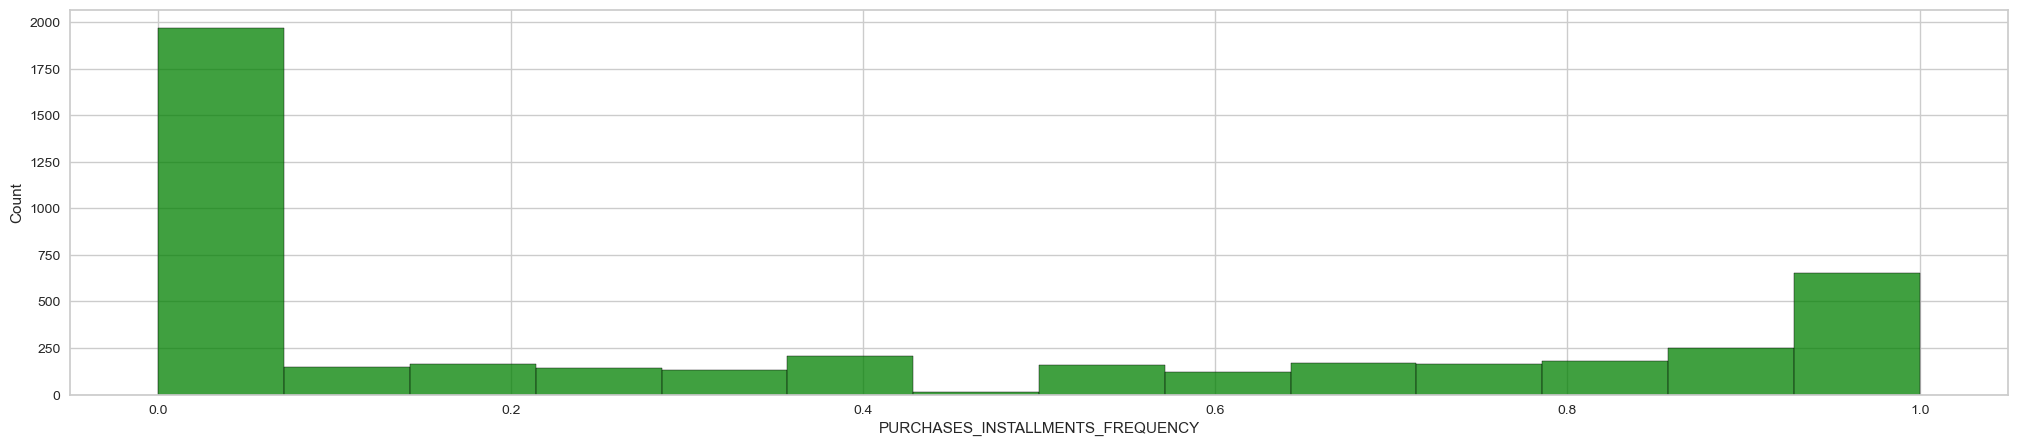

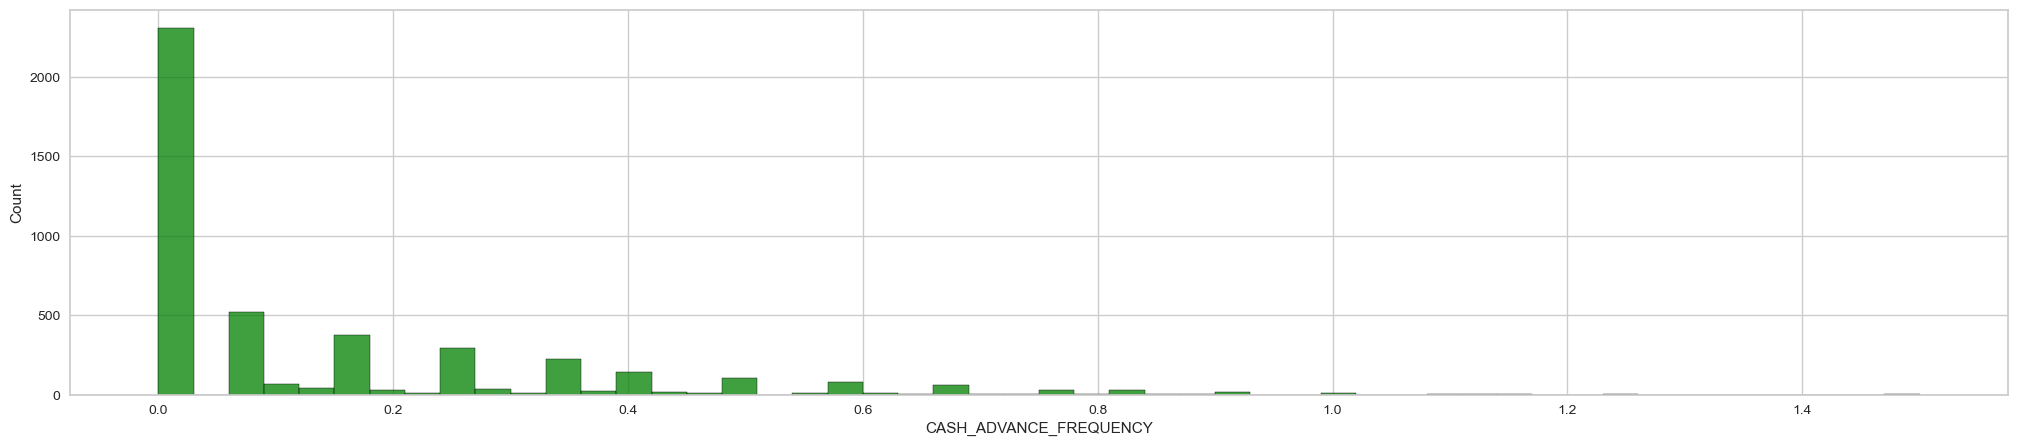

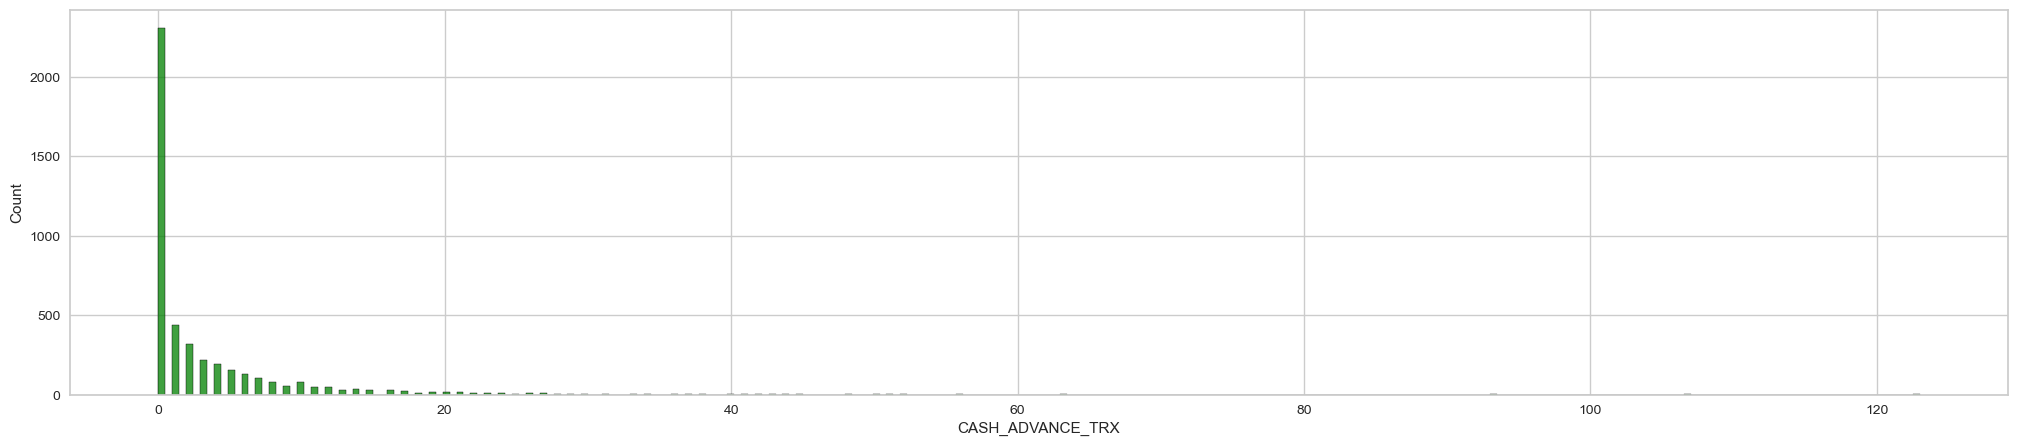

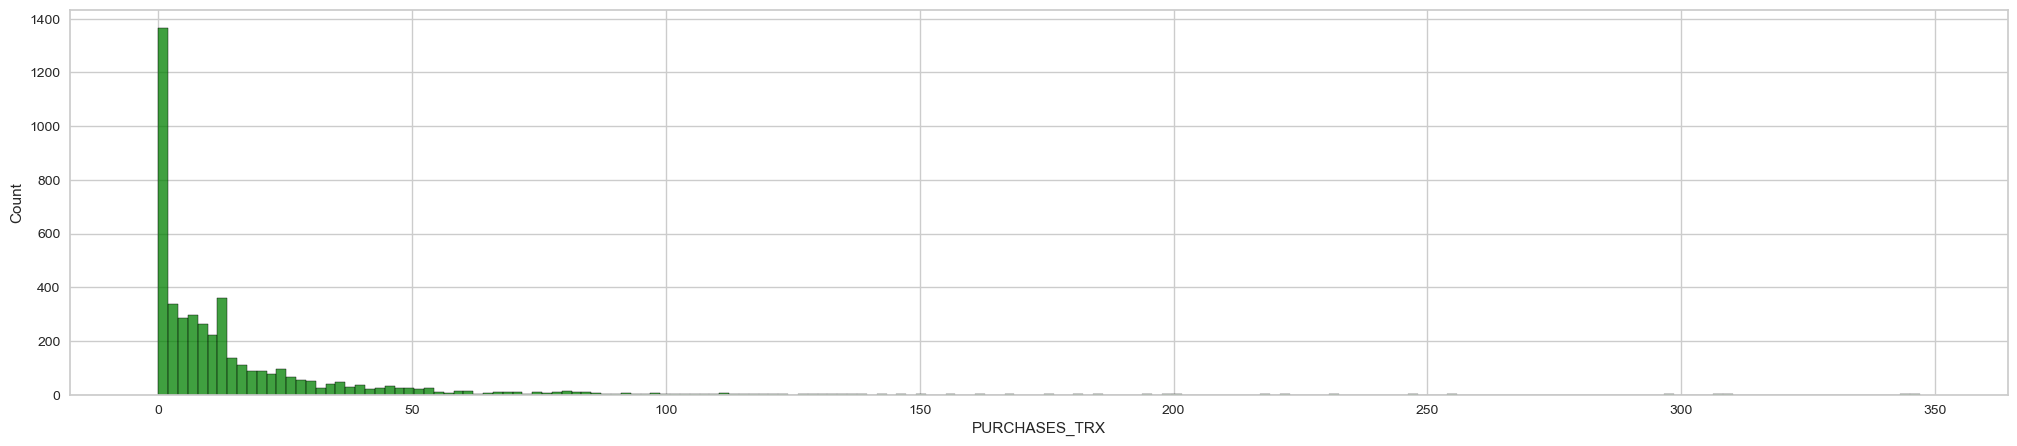

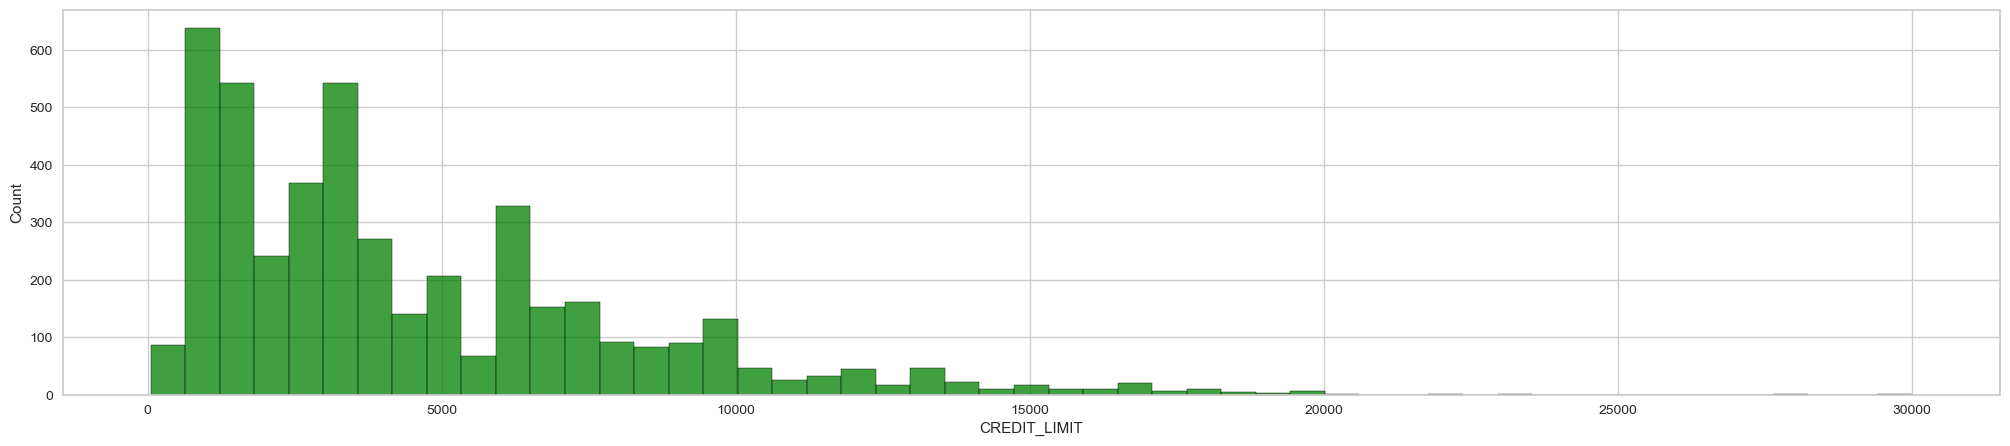

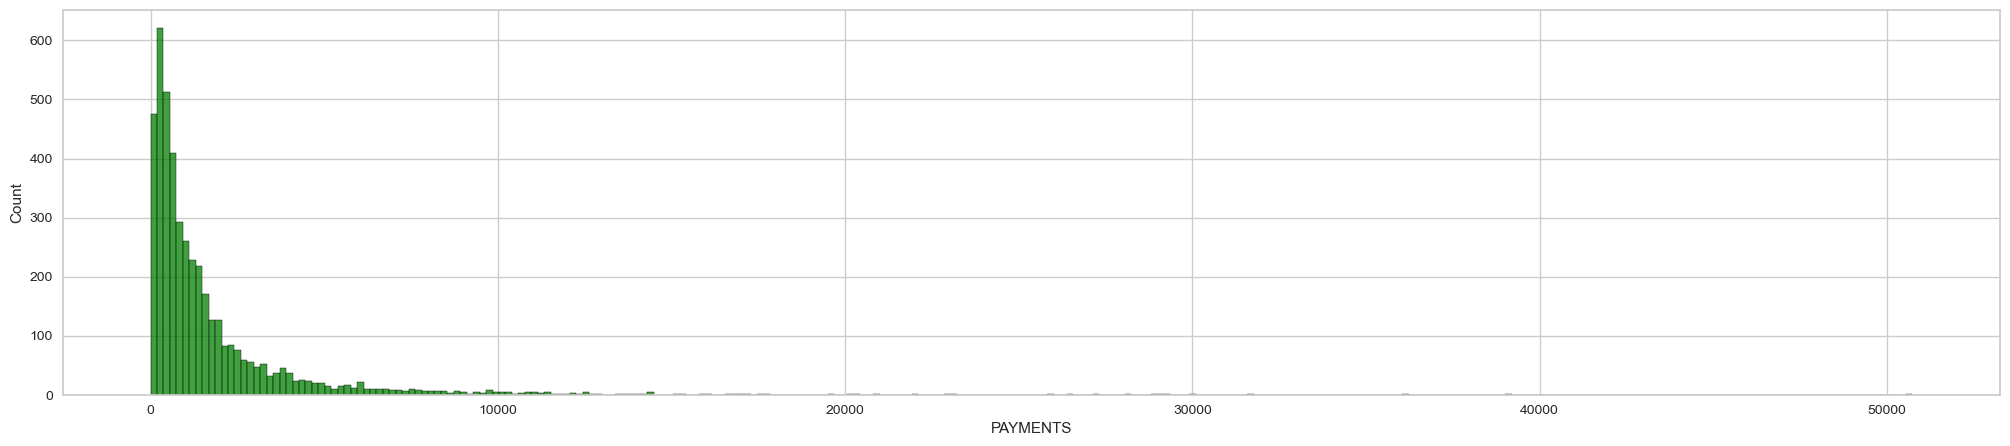

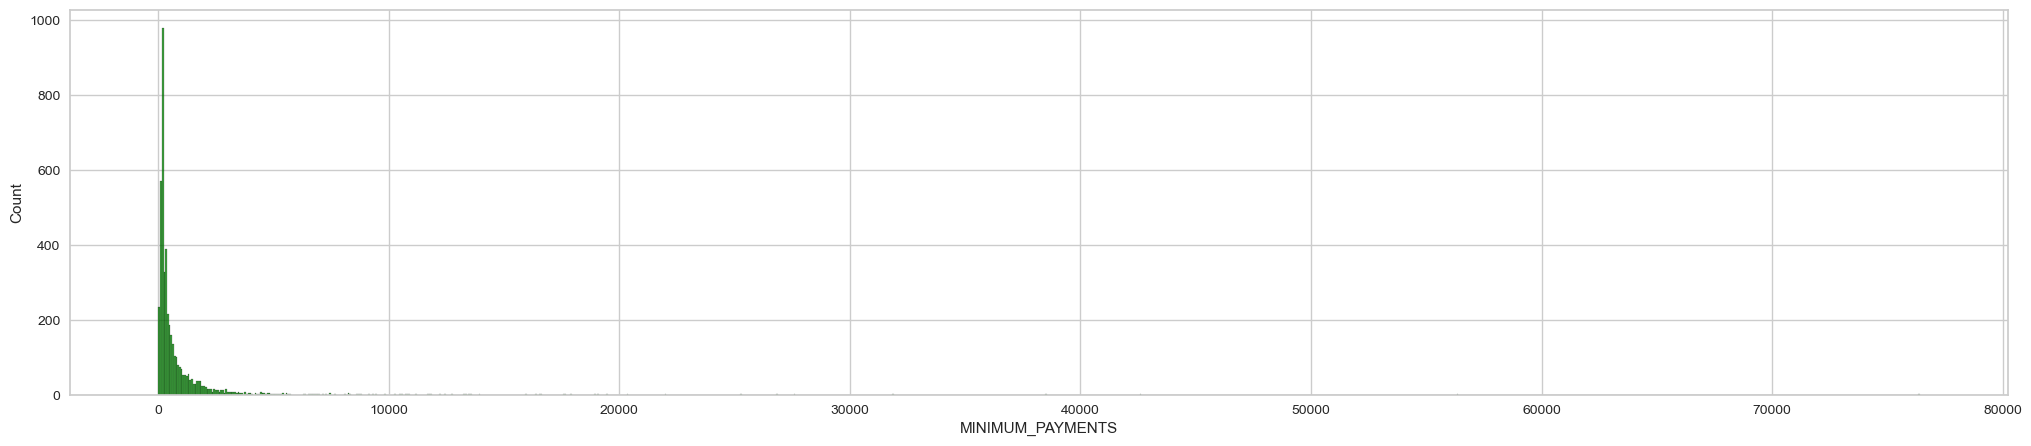

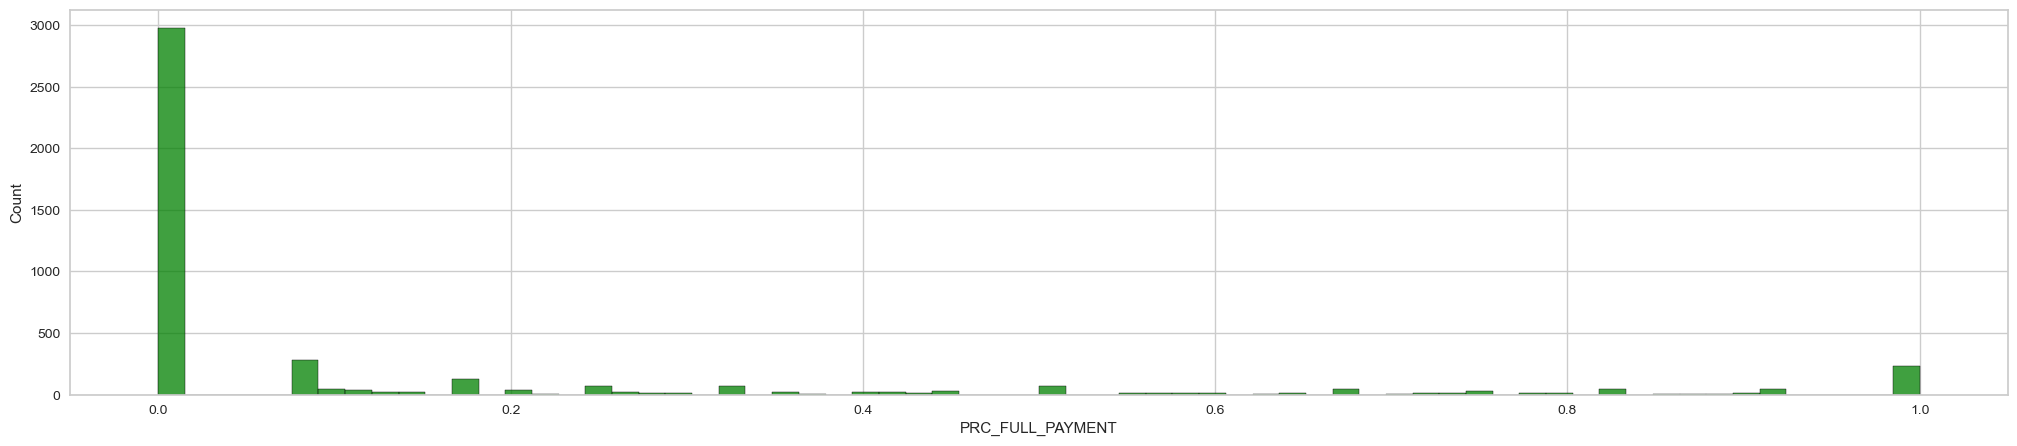

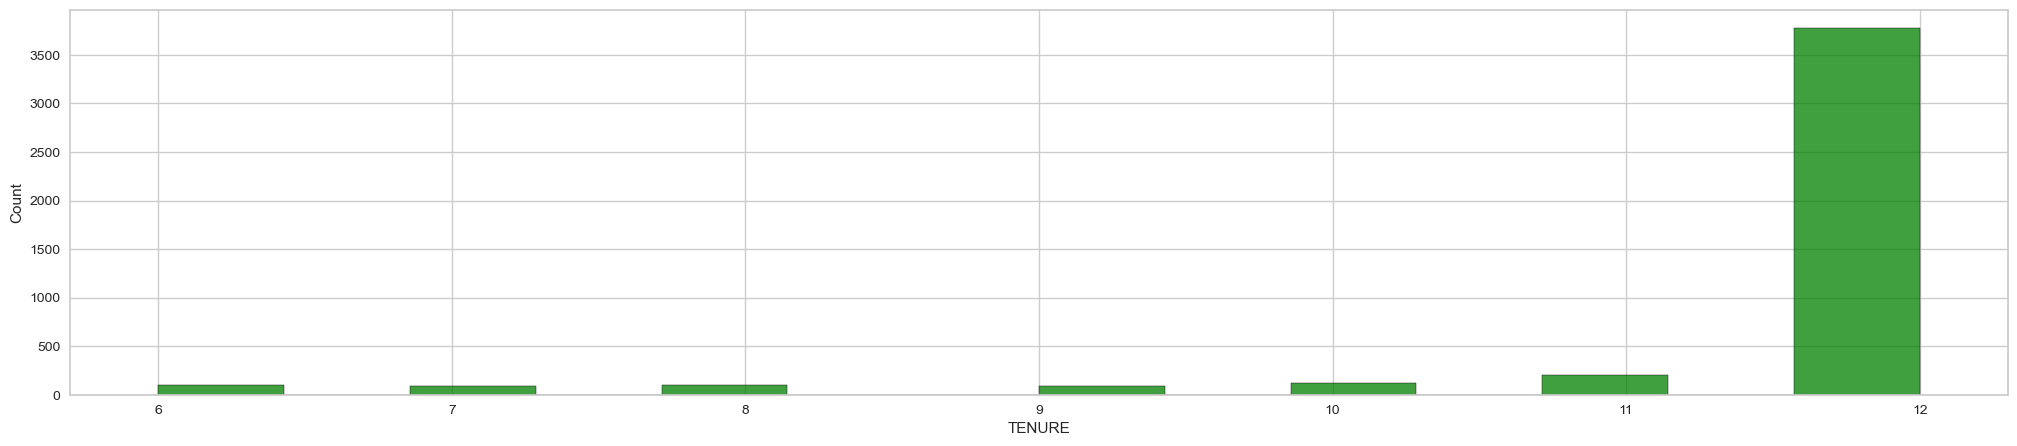

In [17]:
# Melihat distribusi pada semua columns
for column in df.columns:
    plt.figure(figsize = (25,5))
    sns.histplot(df[column], color='green')
    plt.show()

Dari beberapa bar chart diatas, saya menyimpulkan:
- Pada `BALANCE` sebagian besar customer memiliki saldo dibawah 2.500.
- customer memiliki `CREDIT_LIMIT` rata-rata dibawah 10.000.
- `BALANCE` sepertinya berpengaruh kepada feature lain seperti `PURCHASES`, `INSTALLMENTS_PURCHASES` dan `ONEOFF_PURCHASES` karena setiap balance sedikit maka feature diatas juga ikut sedikit.
- Pada `TENURE` atau kepemilikan kartu kredit hampir sebagian customer berlangganan 12 bulan.

**Analisa korelasi antara features**

<Axes: >

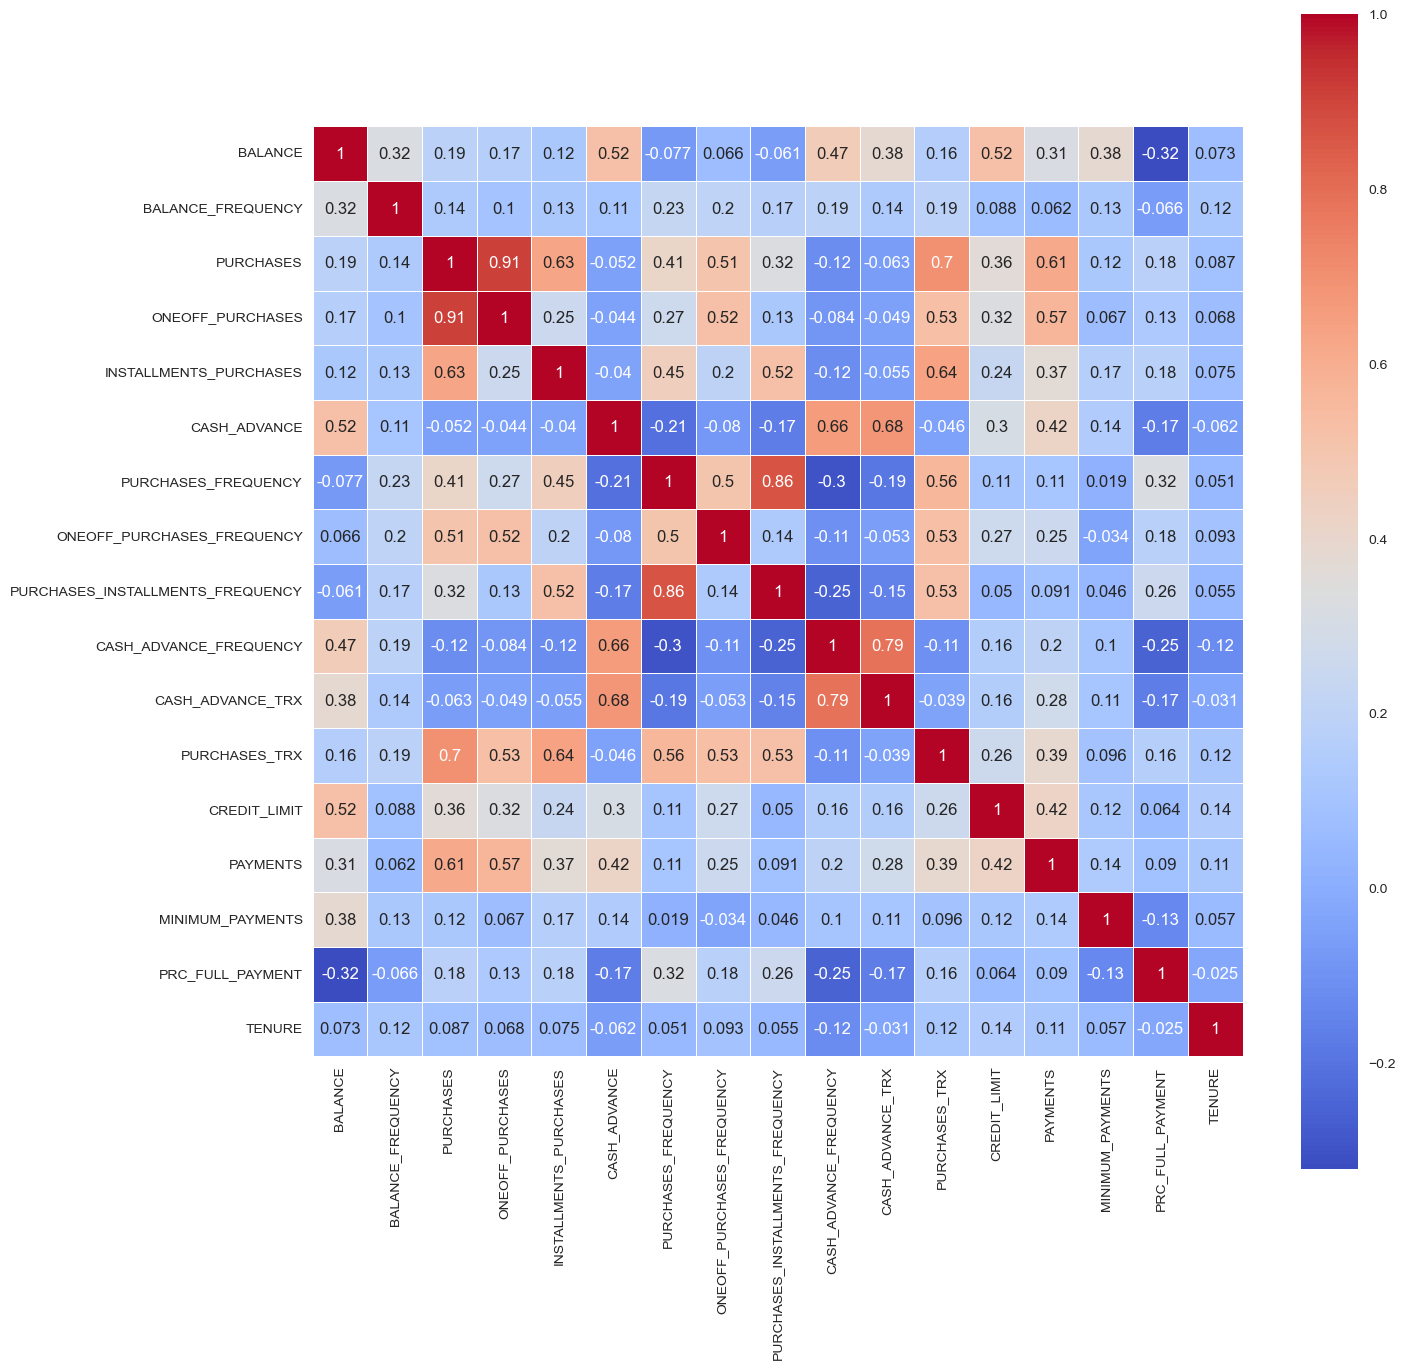

In [18]:
# Membuat heatmap untuk melihat korelasi antara features
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'coolwarm', square = True, annot = True, linewidths = 0.5)

Dari heatmap terlihat beberapa feature memiliki korelasi diantaranya:
- `PURCHASES` dan `ONEOFF_PURCHASES`  
- `CASH_ADVANCE` dan `CASH_ADVANCE_TRX`
- `PURCHASES_FREQUENCY` dan `PURCHASES_INSTALLMENTS_FREQUENCY`

# Bab 6: Feature Engineering

Pada tahap ini saya akan memilih fitur-fitur yang terdapat pada dataset untuk digunakan dalam pembuatan model. Fitur-fitur ini akan dikurangi dimensi datanya atau dikembangkan jika dirasa perlu, kemudian akan dimanfaatkan dengan digunakan pada berbagai teknik.

## Feature Selection

Pada bagian ini saya akan memilih fitur yang akan digunakan dalam analisa selanjutnya sebelum membuat cluster

Column `TENURE` akan saya drop karena menurut saya fitur tersebut bukan fitur transaksi yang tidak signifikan dan merupakan column categorical. Juga akan susah untuk capping outliers karena memiliki variasi yang rendah.

In [19]:
# Melihat unique values 
df.TENURE.unique()

array([ 8, 12, 10,  6,  9,  7, 11], dtype=int64)

In [20]:
# Membuat num_df tanpa TENURE
num_df = df.drop(['TENURE'], axis=1)
num_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0


## Handling Outliers

Pada analisa kali ini saya akan melihat Outliers dengan metode Isolation Forest. Oultiers akan dihitung dan ditampilkan dengan score `IF`pada setiap barisnya.

In [21]:
# Melihat outliers dengan isolation forest

# Define isolation forest
isolation = IsolationForest(n_estimators=100,
                            contamination='auto')

# Fit dan prediksi IF 
isolation.fit(num_df)
outliers_predicted = isolation.predict(num_df)

# Menampilkan outliers pada column baru
df['IF'] = outliers_predicted
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,IF
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


Output dari Isolation Forest :
* `1` sebagai inlier
* `-1` sebagai outlier.

In [22]:
# Menghitung jumlah nilai dalam kolom 'IF'
count_values = df['IF'].value_counts()

# Menampilkan hasil
print(count_values)

IF
 1    3883
-1     592
Name: count, dtype: int64


Diatas terlihat outliers pada dataset ini dan saya akan visualisasikan dengan plot PCA

## Anomalies Visualization

In [23]:
# Membuat PCA dengan n_components=2 untuk visualisasi data
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(num_df)

Text(0, 0.5, '2nd Component')

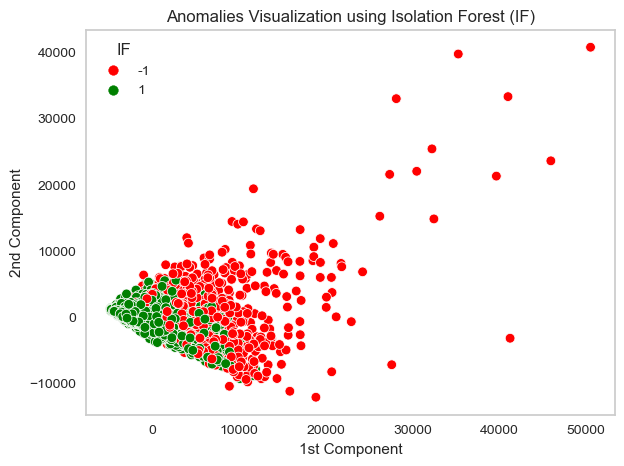

In [24]:
# Plot Cummulative of Explained Variance Ratio dari perhitungan Isolation Forest
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
sns.scatterplot(x=df_pca_2d[:,0], y=df_pca_2d[:,1], hue=df['IF'], palette=['red','green'])
plt.title('Anomalies Visualization using Isolation Forest (IF)')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')

Dari chart terlihat warna merah sebagai outliers dan hijau sebagai inliers, outliers cenderung menjauh dari perseberan rata-rata titik data bahkan ada oultiers di value 50.000

Selanjutnya outliers akan saya handle dengan metode capping menggunakan Winsorizer

In [25]:
# Melakukan capping pada column numerical 
winsorizer_outliers = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])

df_capped = winsorizer_outliers.fit_transform(num_df)

## Feature Scaling

Outliers sudah dicapping dan akan dilakukan feature scaling dengan StandardScaler. Proses ini dilakukan agar setiap column numerical yang memiliki perbedaan skala diubah menjadi rentang skala yang sama dan juga agar antara variable tidak saling mendominasi. StandarScaler berfungsi untuk menstandarisasi fitur dan menskalakan unit dari column.

In [26]:
# Feature scaling dengan StandardScaler 

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_capped)

Selanjutnya dilakukan Dimensionality Reduciton menggunakan PCA, proses ini untuk memudahkan pemilihan fitur dan penggambaran plot saat memilih jumlah cluster

In [27]:
# Menggunakan PCA pada data yang sudah discaling
pca = PCA()
pca.fit(df_scaled)

PCA()

Menghitung dan menggambarkan EVR dan Eigenvalues, guna melihat jumlah komponen yang optimal dalam penentuan seberapa banyak informasi yang ingin saya pertahankan

Text(0, 0.5, 'Eigenvalues')

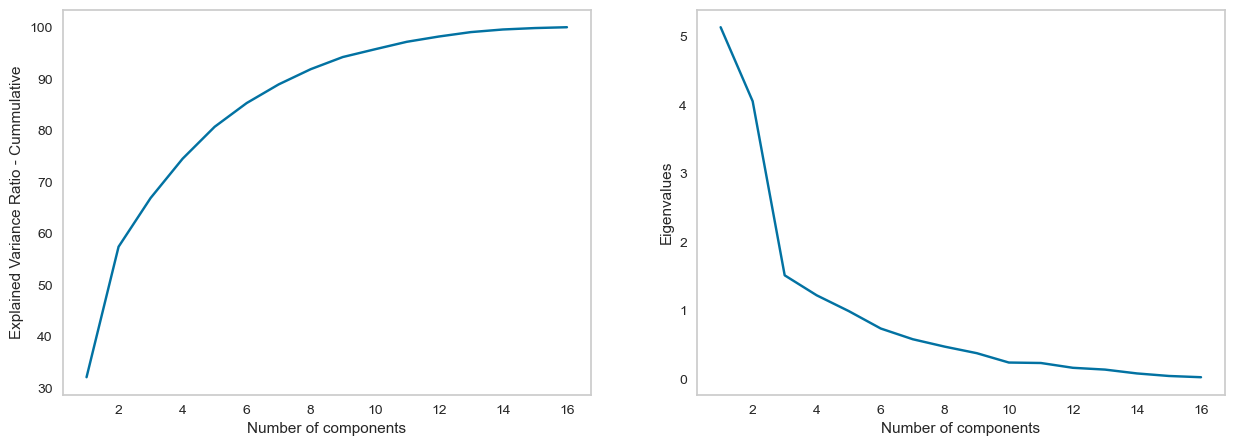

In [28]:
# Plot Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Menginput jumlah informasi yang ingin dipertahankan, dalam analisa kali ini saya ingin mendapat 95% data original

In [29]:
# Menghitung jumlah fitur dengan 95% informasi asli yang ingin didapat 
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Hasil perhitungan dari 16 fitur, menghasilkan 10 fitur optimal dengan jumlah 95% data original.
Kemudian PCA akan di fit sebanyak 95% ke dalam df_scaled

In [30]:
# Define PCA dengan 95 % original data

pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

## Elbow Method

Dari proses sebelumnya akan dilakukan perhitungan ELBOW guna melihat jumlah cluster yang optimal dari data

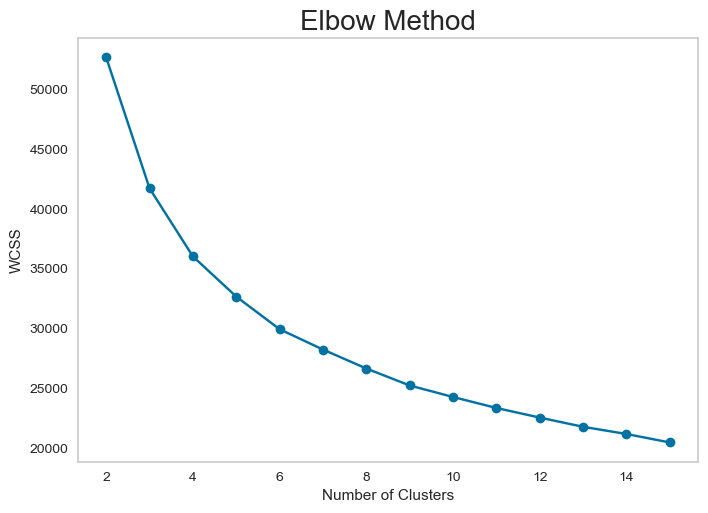

In [31]:
# Mencari jumlah clusters yang optimal menggunakan Elbow Method
wcss = []
random_state = 21
max_cluster = 15
for i in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    kmeans.fit(df_scaled_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Karena Elbow tidak terlihat jelas, saya akan menghitung score elbow dan menampilkan visualisasinya dengan teknik lain

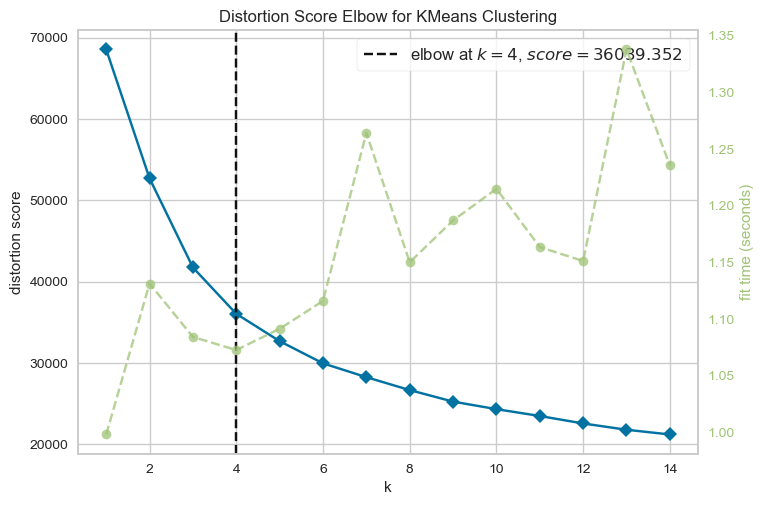

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
# Define KMeans model
kmeans = KMeans()

# Membuat visualisasi menggunakan KElbow Visualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 15))
    
# Masukkan data ke visualizer
visualizer.fit(df_scaled_pca)

# Menampilkan Visualisasi Elbow dan score
visualizer.show()

Dari chart diatas terlihat bahwa elbow terdapat pada cluster 4 dengan score 36039.

## Silhoutte Score

Pada bagian ini saya akan menampilkan silhoutte score dan plot dari cluster dengan berbagai jumlah dan memilih cluster dengan distribusi yang terbaik.

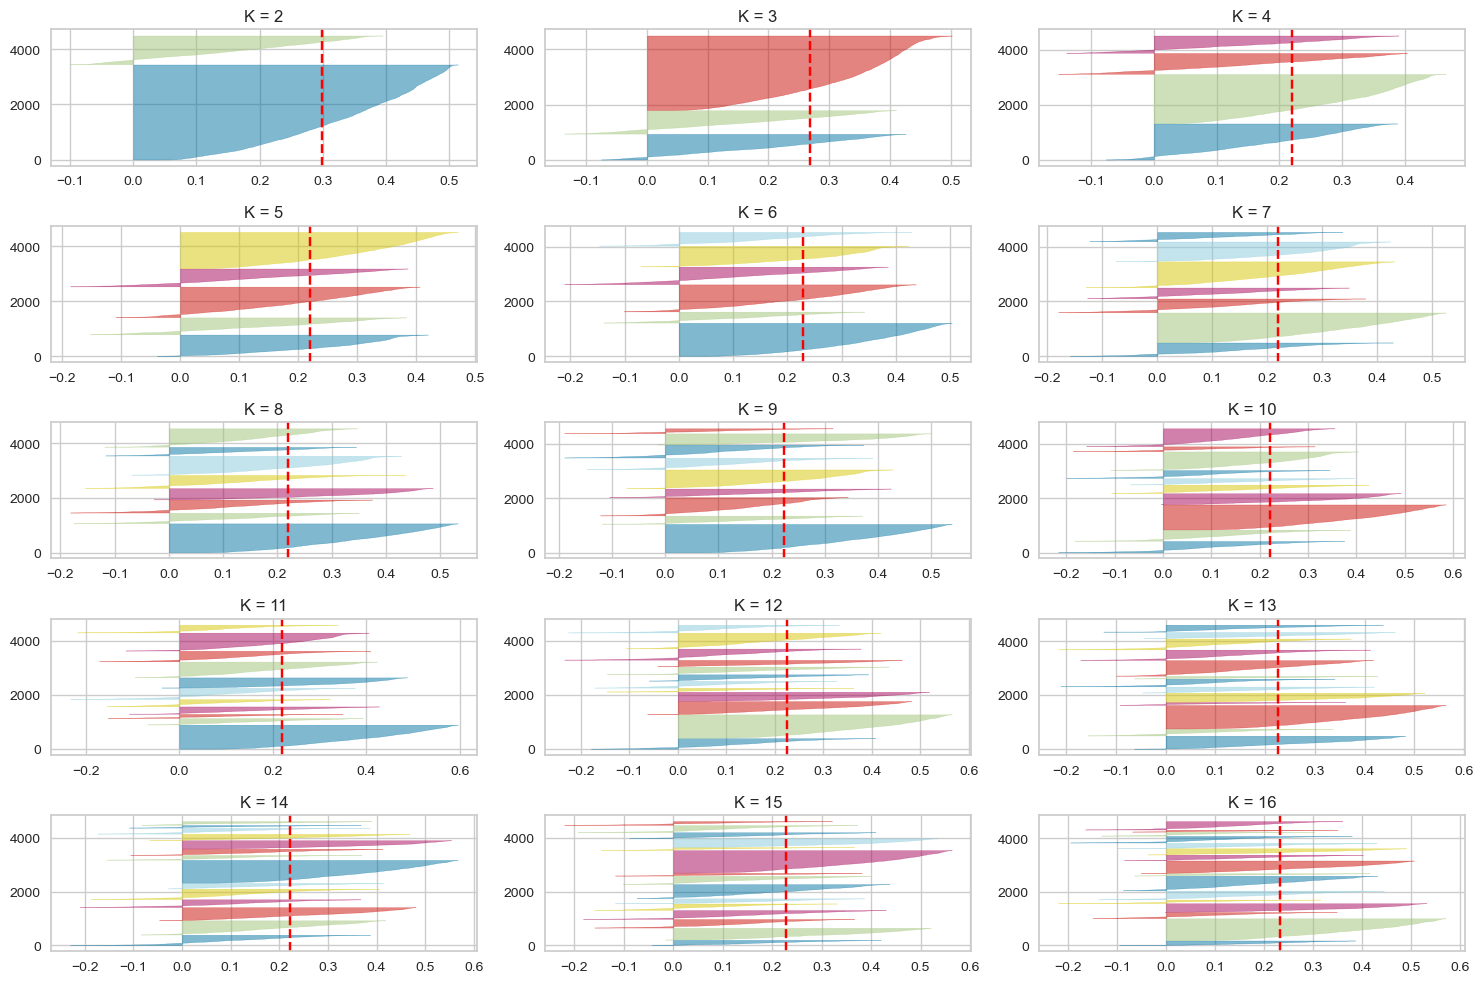

In [33]:
# Menampilkan Silhouette Score dan Silhouette Plot


fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Membuat loop untuk setiap plotnya
for i, ax in enumerate(axes.flatten()):

    # Define K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Membuat SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer dengan data yang sudah di PCA
    visualizer.fit(df_scaled_pca)

    ax.set_title(f'K = {n_clusters}')

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan dari plot diatas, distribusi clusters yang menurut saya terbaik adalah dengan K = 4 karena perbandingan distribusinya hampir berimbang satu sama lain. Maka saya akan melanjutkan dengan 4 cluster dalam analisa kali ini. 

# Bab 7: Model Definition

Metode Clustering yang digunakan untuk classication pada projek kali ini adalah K-means. K-means akan membuat cluster berdasarkan dari atribut dan dihitung dengan cara membuat Centroid sebagai perwakilan dari tiap cluster dan menghitung rata-rata jarak dari tiap titik data dan centroidsnya.

In [34]:
# Define Kmeans
kmeans = KMeans()

# Bab 8: Model Training

Pada bagian ini saya akan menerapkan jumlah cluster yang optimal dari perhitungan sebelumnya, kemudian memasukkannya kembali ke dalam dataset original

In [35]:
# Melatih data dengan jumlah clusters yang optimal

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state=21)
pred = kmeans.fit_predict(df_scaled_pca)
pred

array([1, 1, 1, ..., 2, 2, 2])

Dari hasil diatas kemudian saya akan memvisualisasikan dengan scatterplot 3 dimensi agar bisa terlihat pembagian dari 4 cluster.

In [36]:
# Menampilkan scatter plot 3 dimensi 
fig = px.scatter_3d( df_scaled_pca, x= 0, y= 1, z = 2, color = pred)
fig.show()

In [37]:
# Memasukkan hasil clustering kedalam original dataset
df_raw['cluster'] = pred    
df_raw

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,313.980229,0.0,8,1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,313.980229,0.0,8,1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,2
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,2
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,2
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,2


Setelah cluster dimasukkan kedalam data, mari hitung jumlah pada setiap clusternya

In [38]:
# Menampilkan value counts cluster 
print(df_raw['cluster'].value_counts())

cluster
1    1787
0    1309
2     754
3     625
Name: count, dtype: int64


# Bab 9: MODEL EVALUATION / EDA 2

Bagian ini akan mengevaluasi hasil dari clustering dengan beberapa visualisasi dan analisa terhadap cluster dan fitur

<Axes: >

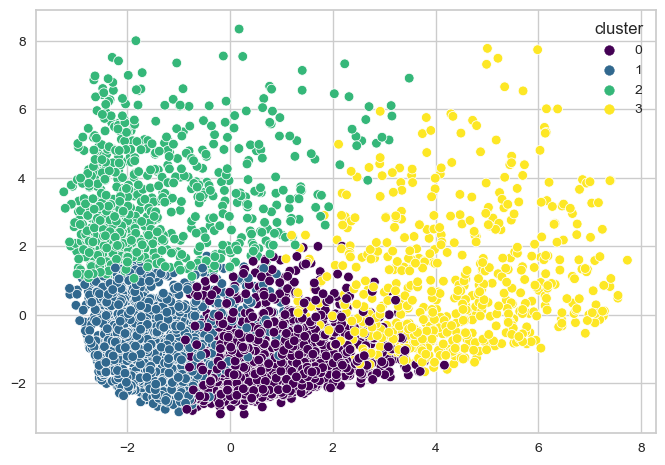

In [39]:
# Cluster visualization dengan scatterplot 2D

pca_2d_final = PCA(n_components=2)
pca_2d_final.fit(df_scaled)

df_scaled_pca_2d = pca_2d_final.fit_transform(df_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df_raw['cluster'], palette='viridis')

- Terdapat persebaran data pada cluster 2 dan cluster 3 mempunyai value yang tinggi
- Sedangkan pada value rata-rata atau value dibawah 2 ada di cluster 0 dan cluster 1

**Jumlah data pada setiap clusters atau pengguna dari kartu kredit**

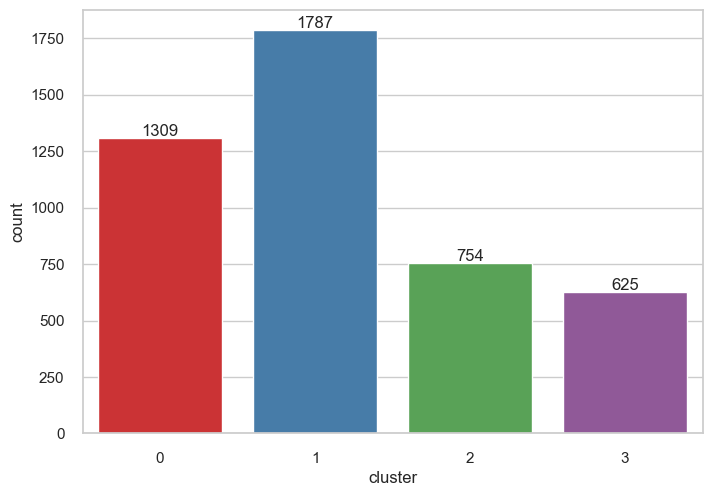

In [40]:
# Menampilkan plot cluster berdasarkan count
sns.set(style="whitegrid", palette='Set1')
ax = sns.countplot(x='cluster', data=df_raw, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

Dari bar chart diatas terlihat cluster 1 mendominasi data dengan 1787, kemudian cluster 0 dengan 1309, lalu cluster 2 dengan 754 dan yang paling sedikit cluster 3 dengan 625 customer

In [41]:
# Menampilkan mean cluster
df_raw.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,618.644019,0.912306,788.294607,228.375180,560.148610,150.985920,0.864272,0.176069,0.732606,0.034535,0.608862,17.197861,3519.371523,931.452616,680.003945,0.276576,11.469824
1,912.187673,0.779355,257.538674,210.000711,47.587767,478.327348,0.170870,0.095953,0.072079,0.095822,1.658086,2.869054,3264.057079,934.729365,505.712972,0.070325,11.449356
2,4084.079913,0.965576,331.498912,198.395650,133.149310,3862.231189,0.247506,0.111968,0.154704,0.450043,12.714854,5.681698,6726.265975,2822.075874,1683.033923,0.025453,11.476127
3,2361.703895,0.974907,4396.000528,2951.920912,1445.039616,704.251877,0.915272,0.670294,0.678330,0.085471,2.281600,55.816000,7365.200000,4430.975189,1218.247522,0.264563,11.867200


- `Balance` berurutan dari paling rendah ke tinggi adalah cluster 0,1,3 dan 2.
- `Purchases` paling tinggi adalah cluster 3 dan paling rendah ada pada cluster 1.
- `Credit limit` paling tinggi ada pada cluster 3 dan 2 kemudian cluster 0 dan 1 hampir sama

Untuk memudahkan pembagian cluster dalam visualisasi, saya akan menamai setiap cluster berdasarkan jumlah `PAYMENTS` nya dengan nama berikut:

0= Bronze  
1= Silver  
2= Gold  
3= Platinum  

In [42]:
# Membuat dfviz untuk visualisasi
df_viz = df_raw.copy()
df_viz['cluster'] = df_viz['cluster'].map({0: "Bronze", 1: "Silver", 2: "Gold", 3: "Platinum"})

**Distribusi ONE_OFF PURCHASES vs PURCHASES terhadap cluster**

Text(0, 0.5, 'PURCHASES')

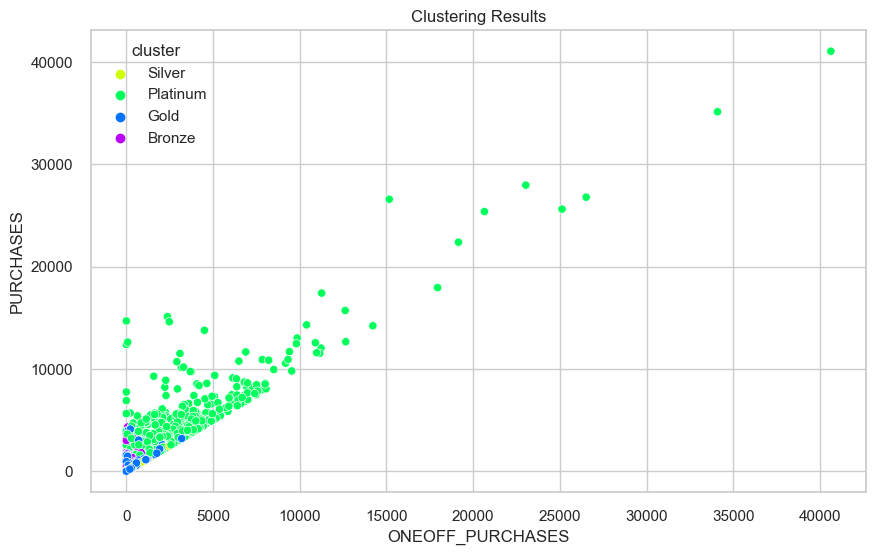

In [43]:
# Menampilkan scatter plot
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_viz['ONEOFF_PURCHASES'], y=df_viz['PURCHASES'], hue = df_viz['cluster'], palette='hsv')
plt.title("Clustering Results")
plt.xlabel("ONEOFF_PURCHASES")
plt.ylabel("PURCHASES")

Dari plot diatas terlihat cluster platinum mendominasi value tinggi dimana Customer cluster 3 dapat melakukan purchases mencapai 40.000 dengan rata-rata purchases 5.000-10.000. Kemudian cluster gold melakukan purchases di angka 0-5.000

**Distribusi CREDIT_LIMIT vs BALANCE terhadap cluster**

Text(0, 0.5, 'BALANCE')

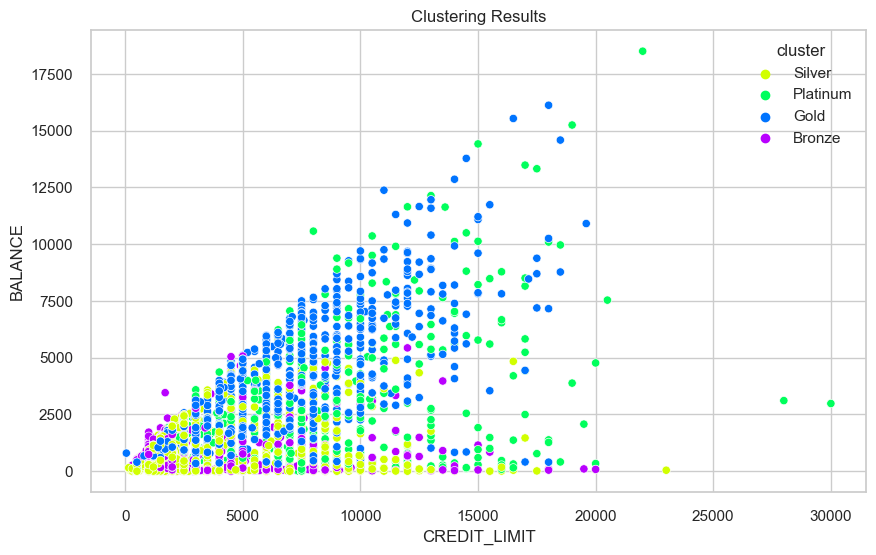

In [44]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x=df_viz['CREDIT_LIMIT'], y=df_viz['BALANCE'], hue = df_viz['cluster'], palette='hsv')
plt.title("Clustering Results")
plt.xlabel("CREDIT_LIMIT")
plt.ylabel("BALANCE")

Pada plot Cluster Platinum terlihat mempunyai Balance dan Credit limit tertinggi dilanjutkan dengan cluster Gold, dimana keduanya mempunyai rata-rata balance 5.000 keatas dan credit limit diatas 7.500. Cluster Bronze dan Gold hanya terdistribusi di Balance <5.000 dan Credit limit < 15.000.

**Melihat korelasi antara fitur dengan clusters**

<Axes: >

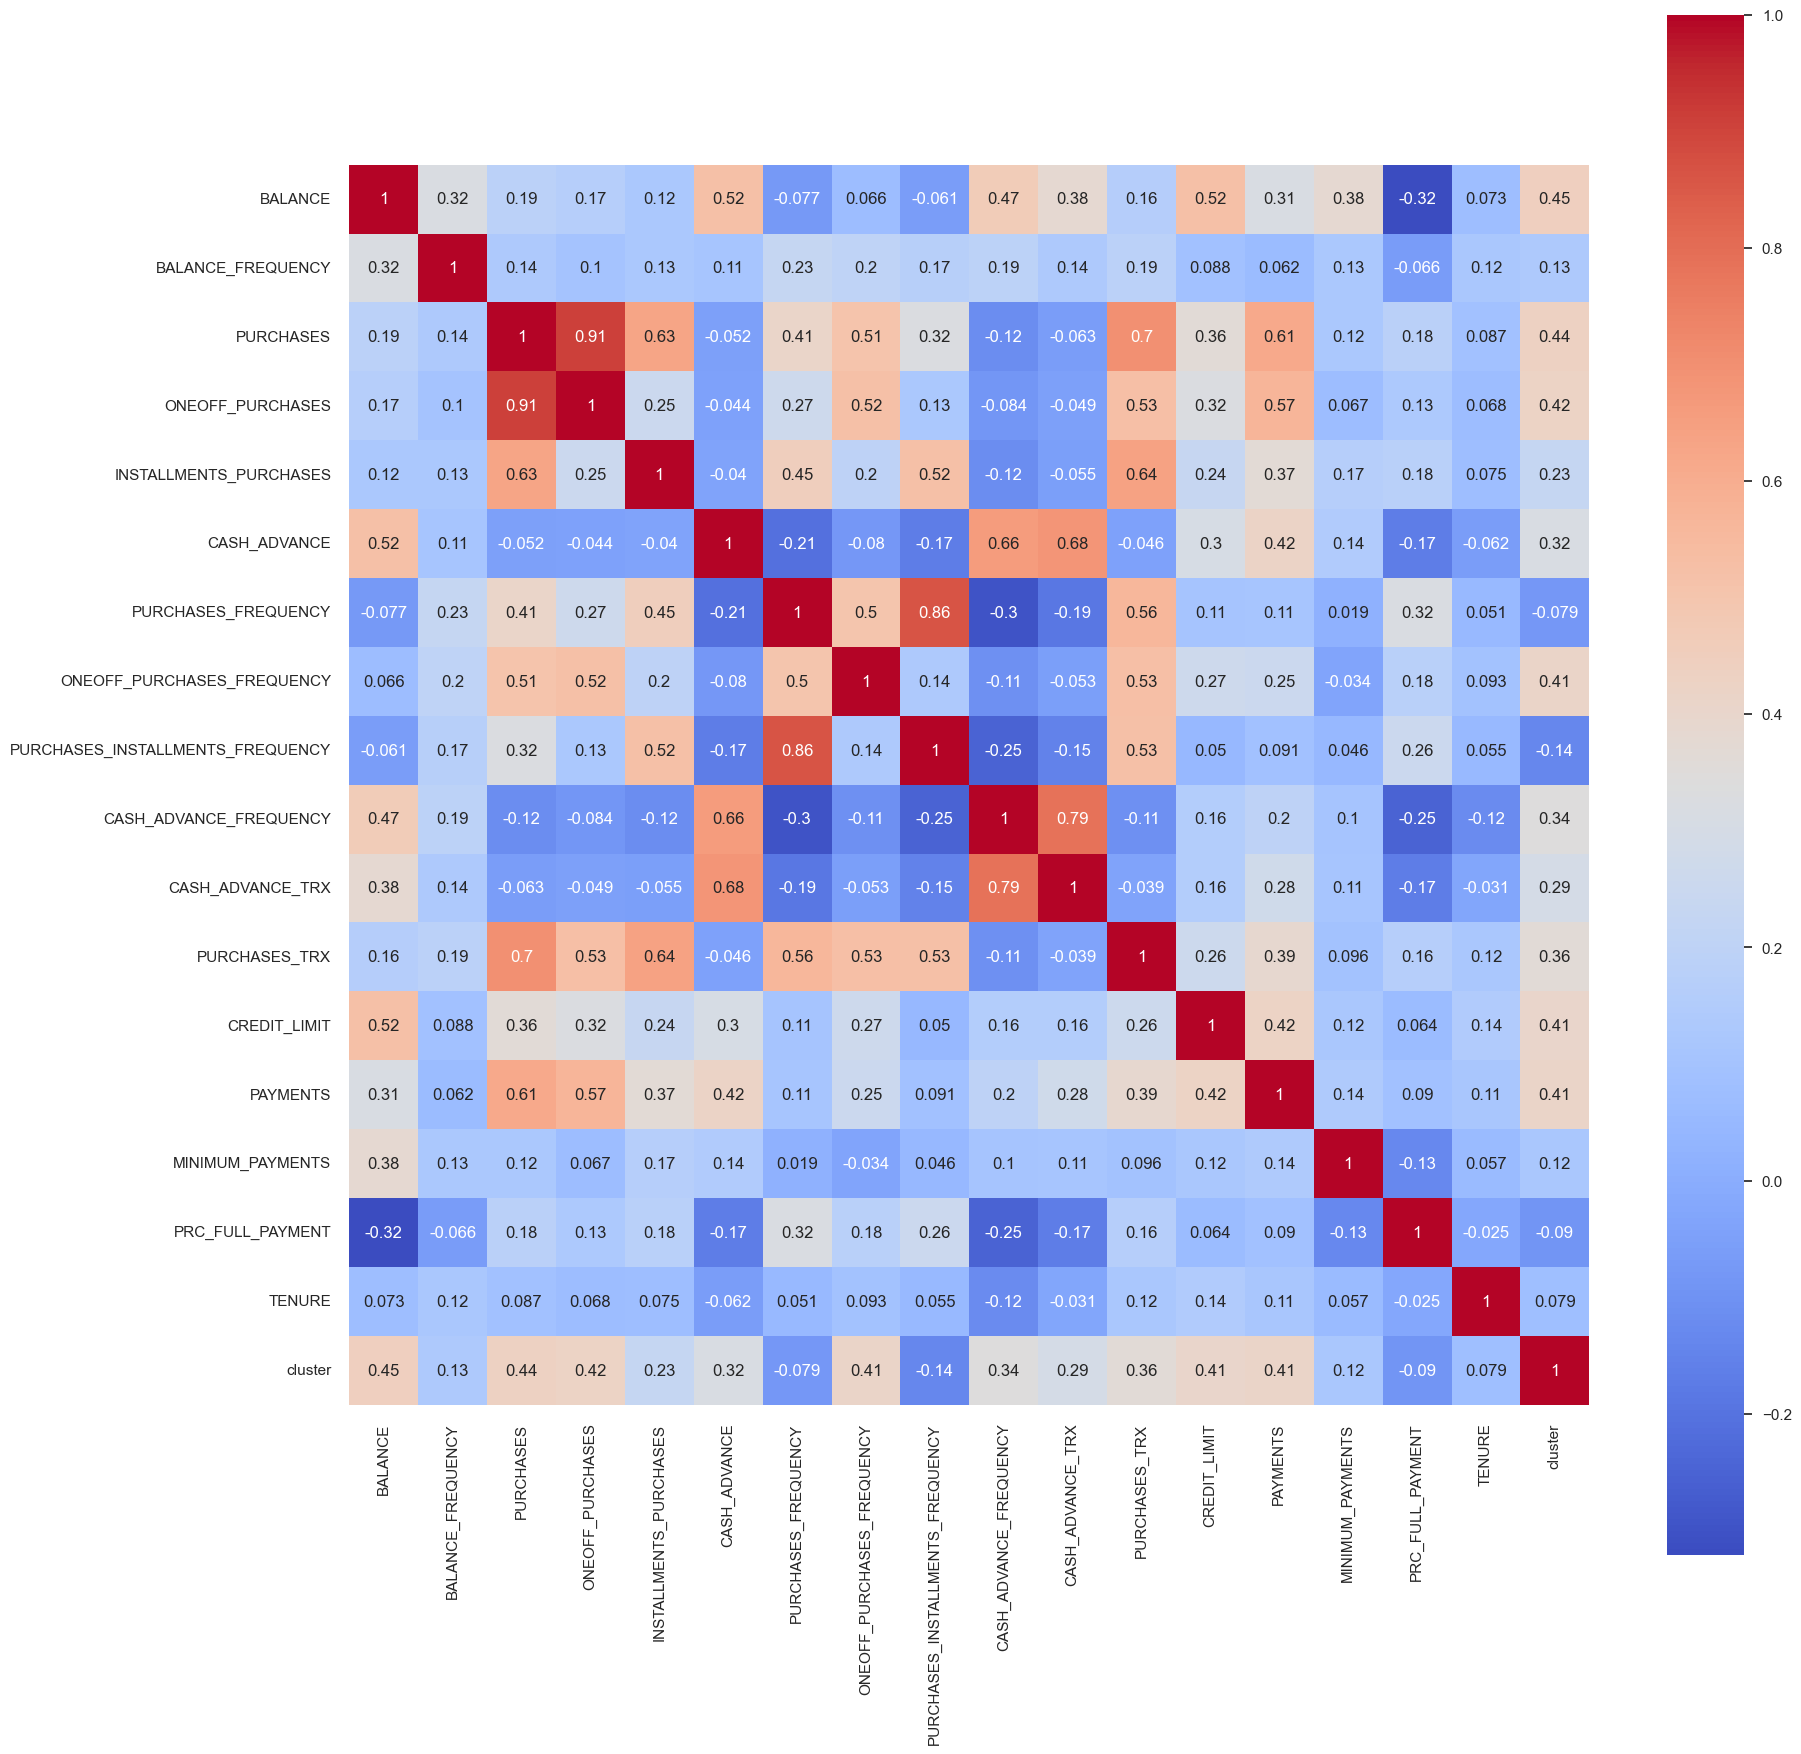

In [45]:
# Menampilkan heatmap korelasi
corr = df_raw.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, square = True, annot = True, cmap = 'coolwarm')

Dari korelasi diatas, saya akan memilih fitur berkorelasi >0.4 terhadap cluster untuk memilih fitur yang penting untuk dianalisa

In [46]:
# Define fitur penting yang korelasi diatas 0.4
important_feature = list(corr[corr['cluster'] > 0.4].index)

In [47]:
# Fitur penting yang berkorelasi 
important_feature

['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'ONEOFF_PURCHASES_FREQUENCY',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'cluster']

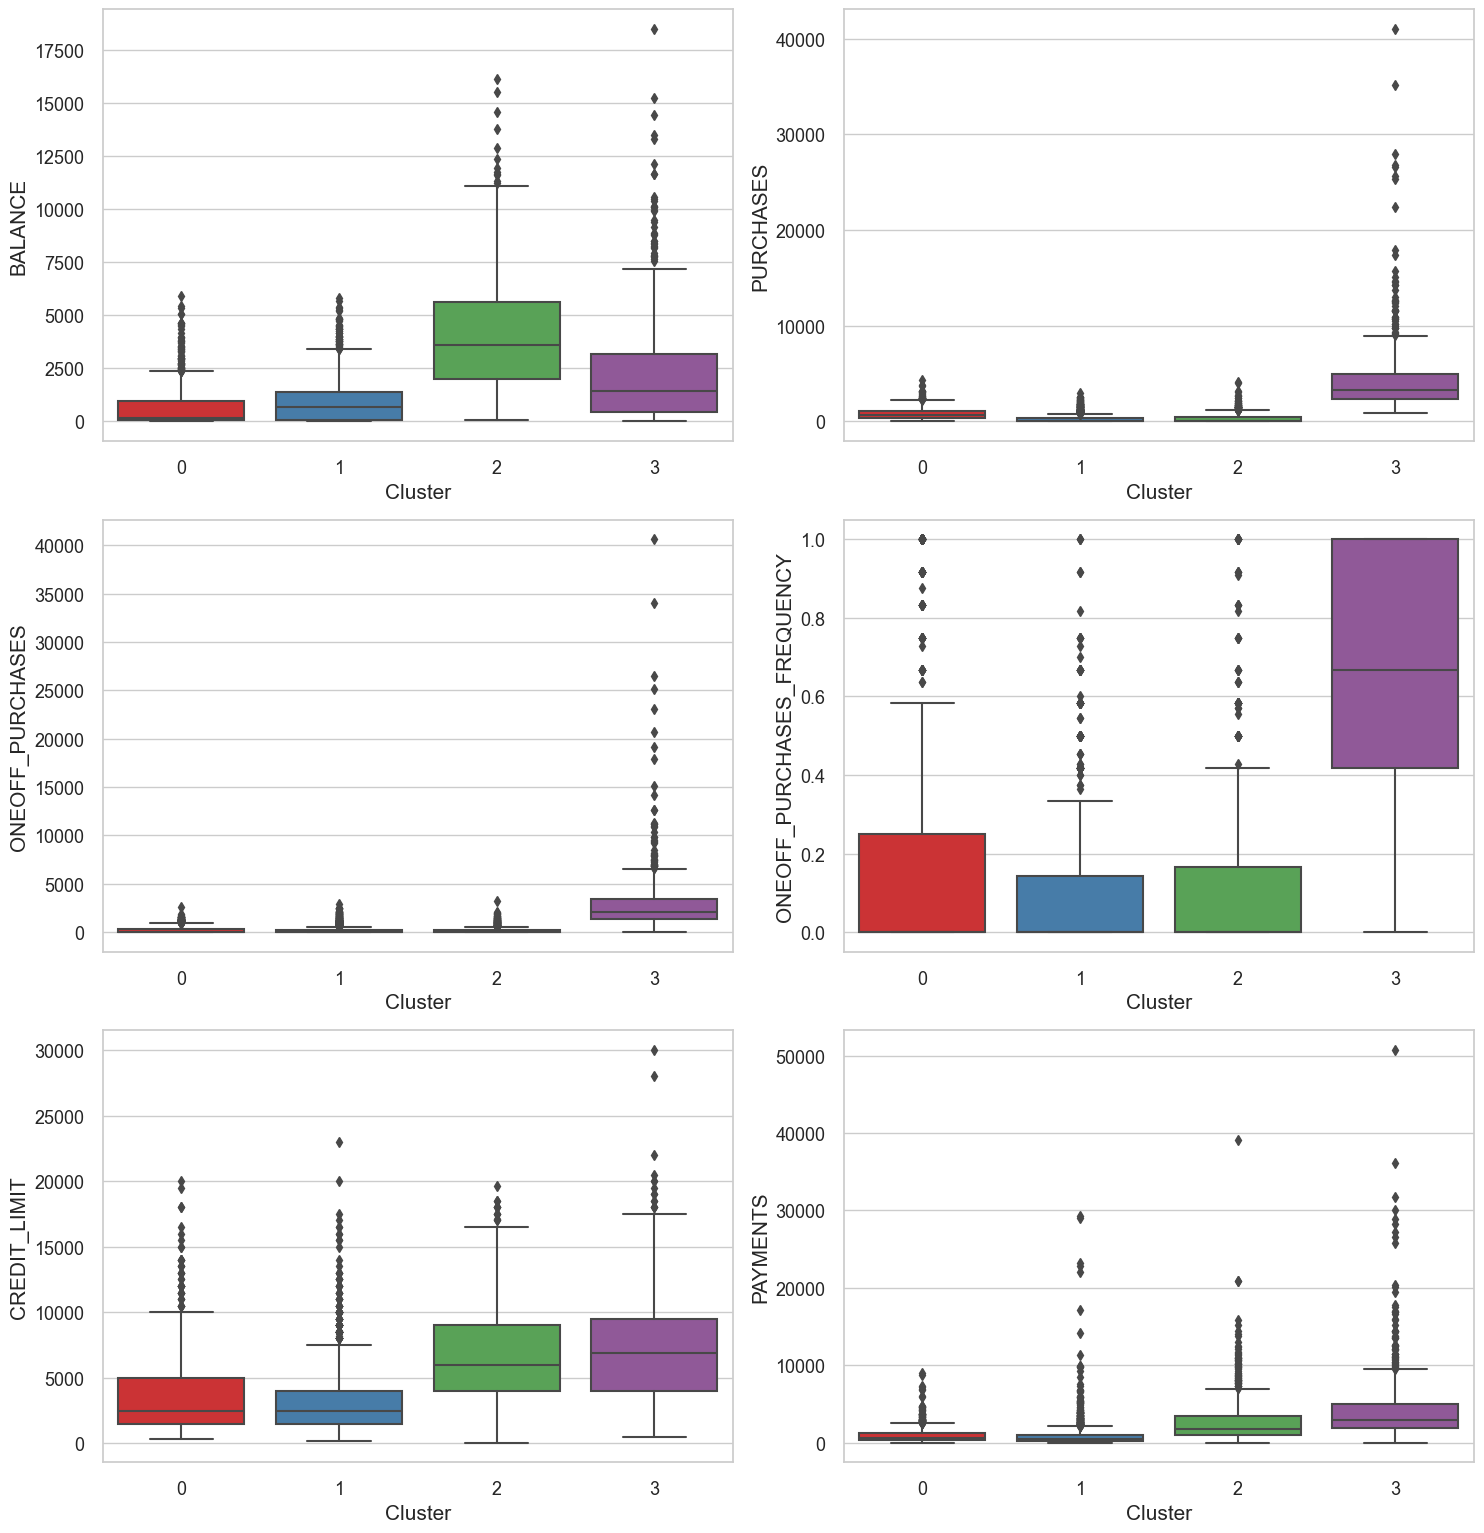

In [48]:
# Menampilkan boxplot dari fitur yang dipilih
plt.figure(figsize = (15, 20))
for i, col in enumerate(important_feature[:-1]):
    ax = plt.subplot(4, 2, i+1)
    sns.boxplot(x = df_raw['cluster'], y = df_raw[col])
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)


plt.tight_layout()
plt.show()

__Cluster Bronze (0):__
- Customer pada cluster ini mempunyai `BALANCE` rendah sebanding dengan kemampuan jumlah `PURCHASES` yang juga rendah.
- Jumlah `ONEOFF_PURCHASES` atau jumlah pembelian dalam sekali transaksi kecil tetapi dengan `ONEOFF_PURCHASES_FREQUENCY` atau frekuensi yang lumayan sering.
- `CREDIT LIMIT` rata-rata 2500-5000 tetapi jumlah `PAYMENTS` sangat kecil di kisaran 1000. 

__Cluster Silver (1):__
- Customer pada cluster ini mempunyai `BALANCE` sedikit lebih tinggi dari cluster 0 tetapi malah jumlah `PURCHASES` lebih kecil dari cluster 0.
- Jumlah `ONEOFF_PURCHASES` atau jumlah pembelian juga relatif sama dengan cluster 0 tetapi dengan `ONEOFF_PURCHASES_FREQUENCY` atau frekuensi yang bahkan lebih jarang atau hampir setengah dari cluster 0.
- `CREDIT LIMIT` lebih kecil dari cluster 0 dengan kisaran rata-rata 4000 tetapi jumlah `PAYMENTS` bisa mencapai 30.000 pada beberapa data.

__Cluster Gold (2):__
- Customer pada cluster ini mempunyai `BALANCE` dengan rata-rata paling tinggi sekitar 4000, terdapat juga beberapa customer mempunyai balance diatas 15.000 dengan jumlah`PURCHASES`sama dengan cluster 1.
- Jumlah `ONEOFF_PURCHASES` atau jumlah pembelian juga relatif sama dengan cluster 1 tetapi dengan `ONEOFF_PURCHASES_FREQUENCY` atau frekuensi yang lebih tinggi sedikit dari cluster 1.
- `CREDIT LIMIT` rata-rata diatas 5.000 dengan maksimal 20.000 dan jumlah `PAYMENTS` rata-rata diatas cluster 0 dan 1, juga bisa mencapai 20.000 pada beberapa data.

__Cluster Platinum (3):__
- Customer pada cluster ini mempunyai `BALANCE` dengan rata-rata sekitar 2500, terdapat juga beberapa customer mempunyai balance diatas 18.000 dengan jumlah`PURCHASES`yang bisa mencapai 40.000.
- Jumlah `ONEOFF_PURCHASES` atau jumlah pembelian dalam sekali transaksi rata-rata 2500 dan paling tinggi bisa meencapai 40.000 dengan  `ONEOFF_PURCHASES_FREQUENCY` atau frekuensi yang paling tinggi diantara cluster lain.
- `CREDIT LIMIT` rata-rata diatas 7.000 dengan maksimal 30.000 dan jumlah `PAYMENTS` rata-rata paling tinggi, juga bisa mencapai 50.000 pada beberapa data.

# Bab 10: Model Saving

In [54]:
# Define pipeline untuk save file
pipeline_kmeans = Pipeline(steps=[('scaler',scaler),
                                  ('pca',pca),
                                  ('kmeans', kmeans)
                                  ])

In [55]:
# Menyimpan algoritma
with open('pipeline.pkl', 'wb') as file_1:
    pickle.dump(pipeline_kmeans, file_1)

# Bab 11: Model Inference

Bagian ini untuk load data inference pada notebook lain

In [50]:
# # Mebuka file pkl
# with open('pipeline.pkl', 'rb') as file_1:
#     pipeline_kmeans = pickle.load(file_1)

# Bab 12: Conclusion

Dari classification bisa disimpulkan bahwa:  

- Cluster 0 :      
Pengguna credit card yang terbawah, mempunyai credit limit standar tetapi lumayan sering belanja. Kemungkinan customer adalah remaja-dewasa karena frekuensi belanja dalam satu kali transaksi cukup besar.

- Cluster 1 :   
Pengguna credit card yang umum, mempunyai credit limit standar tetapi tidak sering belanja dan lebih sering melakukan payments cukup besar. Kemungkinan customer adalah karyawan dimana penggunaan credit card untuk pembayaran bulanan suatu barang atau jasa saja.

- Cluster 2 :   
Pengguna credit card intermediate, mempunyai credit limit cukup tinggi dan cukup sering melakukan payments yang besar. Cukup sering melakukan transaksi dan pembayaran dalam jumlah besar. Kemungkinan customer menggunakan credit card untuk pembayaran transaksi sehari-harinya.

- Cluster 3 :   
Pengguna credit card VIP, mempunyai credit limit paling tinggi dan sering melakukan payments yang besar. Customer ini dapat membayar dalam jumlah besar dalam sekali transaksi dengan frekuensi yang sangat sering. Kemungkinan customer adalah orang menengah keatas atau kaya yang menggunakan credit card untuk pembayaran apa saja.

Kemudian bisa dilihat jumlah `PAYMENTS` juga sebanding dengan tingkat cluster customer, sehingga bisa dikatakan tidak terjadi credit card fraud dimana dikhawatirkan customer dengan cluster 0 melakukan transaksi diatas `CREDIT_LIMIT` mereka.

Dari Cluster segmentation diatas, ada beberapa yang bisa digunakan sebagai insight dalam bisnis diantaranya:

- Mengindentifikasi karakteristik dari customer cluster.
- Mengenali pola transaksi customer.
- Menghitung resiko kredit atau keterlambatan pembayaran dari customer cluster.
- Menyusun strategi yang sesuai bagi setiap segmen customer.


Further Improvements:
- Dari yang saya baca salah satu penelitian mengatakan bahwa nilai Mean MSE yang diperoleh dengan menggunakan penentuan centroid menggunakan mean dan variance lebih baik dibandingkan dengan K-Means standar.

-----------

# Conceptual Problems

1. `Inertia` pada Kmeans adalah sebuah metric yang menghitung jarak dari titik data pada suatu cluster berdasarkan centroid clusternya.  Kmean akan menentukan jumlah cluster yang optimal dengan nilai inertianya dimana semakin kecil nilai inertia maka pengelompokan cluster akan lebih baik.

2. `Elbow Method` adalah salah satu teknik untuk menentukan jumlah cluster yang optimal pada Kmeans clustering. Teknik ini akan menghitung jumlah cluster versus nilai inertia dan mencari elbownya.

    Teknik ini digunakan karena dapat menentukan jumlah original data yang ingin dipertahankan sambil menentukan fitur yang dapat dioptimalkan. Misalnya dalam project ini 95% informasi data original dipertahankan dengan reduksi 17 fitur menjadi 10 fitur saja. Teknik ini dapat menghindari kehilangan banyak informasi dan menentukan keseimbangan yang pas antara informasi dan jumlah fitur.

    Penggunaannya dengan cara menghitung nilai inertia dengan menjalankan Kmeans kemudian menggambarkan plotnya. Elbow method akan memplot nilai inertia yang mengalami penurunan.

- Kelebihannya dapat digambarkan dengan mudah, dan menjadi patokan dalam pemilihan cluster pada awal analisa data. 
- Kelemahannya terkadang elbow method tidak menggambarkan siku yang jelas apalagi jika fitur/cluster tidak terlalu berbeda. Juga karena teknik ini  berdasarkan nilai inertia, jika distribusi data tidak seimbang maka hasilnya akan bias.